In [1]:
#import sys
#print(sys.path)
#sys.path.remove('/work/projects/project01456/lent/cases/scripts/modules')
#print(sys.path)
import dataframeWithMetadata as dfmd
import dataAgglomeration as da
import os
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.lines import Line2D
rcParams["figure.dpi"] = 400
#sys.path.append(os.environ['ARGO_PYTHON_MODULES'])
#if (not(os.path.exists('figures'))):
#    os.mkdir('figures')

idx = pd.IndexSlice


In [23]:
def plot_conservation_Euler_upwind(dframe,col,title):

        
    timeSchemes = dframe.index.get_level_values("timeSchemes").unique()
    fluxSchemes = dframe.index.get_level_values("fluxSchemes").unique()
    #dframe=dframe.loc[idx[divScheme]]
    resolutions = dframe.index.get_level_values("resolution").unique()

    for resolution in resolutions: 
            df_subset = dframe.loc[timeSchemes[0],fluxSchemes[0],resolution]
            Sum = df_subset[col]
            Sum0 = Sum[0]
            plt.plot(df_subset["time"], (Sum-Sum0) / Sum0, 
                         label=" Euler+upwind; N%s" % (resolution))
   # plt.title(title)
    plt.ylabel(title)
    plt.xlabel("Time in seconds")
    plt.ylim(-1e-17,1e-17)
    #plt.yscale('symlog')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)

def plot_schemes_dframe(dframe,col,title,ylim,yreclim,setYlimL, setYlimR, scalar="linear", recWidth=0, extraticks=[]):
    """Plots the temporal evolution of the L-INFINITY velocity error norm for each mesh resolution and density ratio."""
    
    timeSchemes = ["Euler", "CrankNicolson"]#dframe.index.get_level_values("timeSchemes").unique()
    fluxSchemes = ["upwind", "cubic","limitedLinearV","linear","LUST","MUSCL", "QUICK", "SuperBee", "vanLeer"]
    resolutions = [64]#dframe.index.get_level_values("resolution").unique()
    # Create the main figure and axis
    fig, ax = plt.subplots()
    
    # Create a zoomed-in subfigure
    sub_ax = plt.axes([1, 0.3, 0.4, 0.4])  # [left, bottom, width, height]


    #print(CFLs)
    #CFLs=[0.005, 0.01, 0.05, 0.1]
    #resolution = 32
    #v = 0.01
    for resolution in resolutions:
        for timeScheme in timeSchemes:
            for fluxScheme in fluxSchemes:
                if (timeScheme == "Euler") | ((timeScheme == "CrankNicolson") & (fluxScheme == "upwind")):
                    df_subset = dframe.loc[timeScheme,fluxScheme,resolution]
                    if title == "Spericity Error":
                        sph = df_subset[col]#["sphericity"]
                        #sumAlpha0 = sumAlpha[0]
                        ax.plot(df_subset["time"], sph-sph[0], 
                                     label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
                        sub_ax.plot(df_subset["time"], sph-sph[0], 
                                     label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
                    elif title == "Normalized Momentum Error":
                        MOMx=df_subset["MOMx"]
                        MOMy=df_subset["MOMy"]
                        MOMz=df_subset["MOMz"]
                        MOM=((MOMx)**2+(MOMy)**2+(MOMz)**2)**0.5
                        #MOM0=((MOMx[0])**2+(MOMy[0])**2+(MOMz[0])**2)**0.5
                        #sumAlpha = df_subset[col]
                        #sumAlpha0 = sumAlpha[0]
                        ax.plot(df_subset["time"], (MOM-MOM[0])/MOM[0],#((MOMx-MOMx[0])**2+(MOMy-MOMy[0])**2+(MOMz-MOMz[0])**2)**0.5/MOM0, 
                                     label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
                        sub_ax.plot(df_subset["time"], (MOM-MOM[0])/MOM[0],
                                   label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))#((MOMx-MOMx[0])**2+(MOMy-MOMy[0])**2+(MOMz-MOMz[0])**2)**0.5/MOM0)
                    else:
                        sumAlpha = df_subset[col]
                        sumAlpha0 = sumAlpha[0]
                        ax.plot(df_subset["time"], (sumAlpha-sumAlpha0) / sumAlpha0, 
                                     label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
                        sub_ax.plot(df_subset["time"], (sumAlpha-sumAlpha0) / sumAlpha0, 
                                     label=" %s+%s; N%s" % (timeScheme, fluxScheme, resolution))
                    #axes = plt.axes([.96, .96, .30, .30])
                #axes.plot(df_subset["time"],(sumAlpha-sumAlpha0) / sumAlpha0, c='green', lw=1)
    
    sub_ax.set_xlim(left=0.07)
    sub_ax.set_ylim(-ylim, ylim)
    sub_ax.set_yscale(scalar)
    sub_ax.set_yticks(list(sub_ax.get_yticks()) + extraticks)
    ### set special legend for zoomed-in 
    #legend = sub_ax.legend()

    # Get the handles and labels from the legend
    handles, labels = sub_ax.get_legend_handles_labels()#legend.get_handles_labels()
    
    # Create a new list to store modified labels
    modified_handles=[]
    modified_labels = []

    # Iterate over the handles and labels
    for handle, label in zip(handles, labels):
        # Get the x-data from the handle
        xdata = handle.get_xdata()
        ydata = handle.get_ydata()

        # Check if any x-data is within the x-limits
        if any((x >= sub_ax.get_xlim()[0]) and (x <= sub_ax.get_xlim()[1]) and (y >= sub_ax.get_ylim()[0]) and (y <= sub_ax.get_ylim()[1]) for x, y in zip(xdata,ydata)):#for x in xdata):
            modified_labels.append(label)
            modified_handles.append(handle)

    sub_ax.legend(modified_handles, modified_labels,loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)

    ax.set_ylabel(title)
    ax.set_xlabel("Time in seconds")
    #plt.yscale('log')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=2)
    if recWidth==0:
        rect = patches.Rectangle((0.07, -yreclim), 0.04, 2*yreclim, linestyle='dashed', edgecolor='black', facecolor='none')
    else:
        rect = patches.Rectangle((0.07, -yreclim), 0.04, recWidth, linestyle='dashed', edgecolor='black', facecolor='none')
    
    ax.add_patch(rect)
    
    top_left=[1, 0.7]
    bottom_left=[1., 0.3]
    
    ax.set_xlim(0, 0.118)
    ax.set_ylim(setYlimL, setYlimR) #(-1e-6, 1.42e-5)
    ax.set_yscale(scalar)

    #adjust box in case the center deviates from zero
    if recWidth==0:
        top_right=ax.transData.transform((0.11, yreclim))
    else:
        top_right=ax.transData.transform((0.11, recWidth-yreclim))

    top_right=fig.transFigure.inverted().transform(top_right)
    bottom_right=ax.transData.transform((0.11, -yreclim))
    bottom_right=fig.transFigure.inverted().transform(bottom_right)
    
    line1 = Line2D((top_right[0], top_left[0]),(top_right[1], top_left[1]), transform=fig.transFigure, color='gray',alpha=0.5)#, linestyle='dashed')
    line2 = Line2D((bottom_right[0], bottom_left[0]),(bottom_right[1], bottom_left[1]), transform=fig.transFigure, color='gray',alpha=0.5)#, linestyle='dashed')

    # Add the line to the figure
    fig.add_artist(line1)
    fig.add_artist(line2)
    
    # Show the plot
    plt.show()

In [2]:
agglomerator = da.data_agglomerator("Zuzio2020_schemes.parameter","bubblepproc.dat", 
                                     "isoAdv-Zuzio2020_schemes_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoAdv-Zuzio2020_bubblepproc.csv")
dframe_isoAdv_bubblepproc = agglomerator.study_dataframe().sort_index()

agglomerator = da.data_agglomerator("Zuzio2020_schemes.parameter","SumKinE.dat", 
                                     "isoAdv-Zuzio2020_schemes_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoAdv-Zuzio2020_SumMOM.csv")
dframe_isoAdv_SumMOM = agglomerator.study_dataframe().sort_index()

agglomerator = da.data_agglomerator("Zuzio2020_schemes.parameter","bubblepproc.dat", 
                                     "isoRho-Zuzio2020_schemes_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoRho-Zuzio2020_bubblepproc.csv")
dframe_isoRho_bubblepproc = agglomerator.study_dataframe().sort_index()

agglomerator = da.data_agglomerator("Zuzio2020_schemes.parameter","SumKinE.dat", 
                                     "isoRho-Zuzio2020_schemes_00000_templateCase")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("isoRho-Zuzio2020_SumMOM.csv")
dframe_isoRho_SumMOM = agglomerator.study_dataframe().sort_index()

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[['placeholder.stl'], [0.150001], [0.500007], [0.500007], [0.500007], ['CrankNicolson', 'Euler'], ['LUST', 'MUSCL', 'QUICK', 'SuperBee', 'cubic', 'limitedLinearV', 'linear', 'upwind', 'vanLeer'], [0.1], [0.01], [32, 48, 64], [0], [0], [10], [0.0], [0.0], [1.0], [0.0], [1000000.0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['surface_file', 'radius', 'z_centre', 'y_centre', 'x_centre', 'timeSchemes', 'fluxSchemes', 'end_time', 'CFL_num', 'resolution', 'y_velocity', 'x_velocity', 'z_velocity', 'surface_tension_coefficient', 'nu_ambient

In [37]:
def print_Verror(dframe, dFrame, tScheme):
    #meshTypes = dframe.index.get_level_values("meshType").unique()
    if (tScheme == "Euler"):
        fluxSchemes = ["upwind", "cubic","limitedLinearV","linear","LUST","MUSCL", "QUICK", "SuperBee", "vanLeer"] #dframe.index.get_level_values("fluxSchemes").unique()
    else:
        fluxSchemes = ["upwind"]
    resolutions = dframe.index.get_level_values("resolution").unique()
    #gravityModels = [model]#['gravity', 'gravityDirac', 'gravityRecon']
    #marker_list = list(Line2D.markers.keys()) #['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
    #marker_list = ['o', 'v']
    
    for fluxScheme in fluxSchemes:
        #marker = random.choice(marker_list)
        for resolution in resolutions:
            if (tScheme == "Euler"):
                df = dframe.loc[(fluxScheme,resolution),:]
                df_subset = dFrame.loc[(fluxScheme,resolution),:]
            else:
                df = dframe.loc[resolution,:]
                df_subset = dFrame.loc[resolution,:]
            MOMx=df_subset["MOMx"]
            MOMy=df_subset["MOMy"]
            MOMz=df_subset["MOMz"]
            MOM=((MOMx)**2+(MOMy)**2+(MOMz)**2)**0.5
            MOMerror=(MOM.iloc[-1]-MOM[0])/MOM[0]
            Verror = (df["bubbleVolume"].iloc[-1]-df["bubbleVolume"].iloc[0])/df["bubbleVolume"].iloc[0]
            SphError = (df["sphericity"].iloc[-1]-df["sphericity"].iloc[0])/df["sphericity"].iloc[0]
            print(" endTime: %s, %s, N %s, Verror: %s, MomError: %s , SPHerror: %s." % (df["time"].iloc[-1], fluxScheme, resolution, Verror, MOMerror, SphError))

In [38]:
isoAdv_Verror_Euler = dframe_isoAdv_bubblepproc.loc["Euler",:]
isoAdv_Verror_CN = dframe_isoAdv_bubblepproc.loc["CrankNicolson","upwind",:]

isoAdv_SumMOM_Euler = dframe_isoAdv_SumMOM.loc["Euler",:]
isoAdv_SumMOM_CN = dframe_isoAdv_SumMOM.loc["CrankNicolson","upwind",:]

print_Verror(isoAdv_Verror_Euler, isoAdv_SumMOM_Euler, "Euler")
print_Verror(isoAdv_Verror_CN, isoAdv_SumMOM_CN, "CN")
#print(" %s, N %s, final volume error: %s" % (fluxScheme, resolution, Verror))

 endTime: 0.100013, upwind, N 32, Verror: 0.0, MomError: 0.0 , SPHerror: -0.0015255530129672443.
 endTime: 0.100001, upwind, N 48, Verror: 0.0, MomError: 0.0 , SPHerror: -0.0009492958573513054.
 endTime: 0.0999943, upwind, N 64, Verror: 0.0, MomError: 0.0 , SPHerror: -0.0011470044396982683.
 endTime: 0.0366753, cubic, N 32, Verror: 0.00010160094053432112, MomError: 0.0003055317550510251 , SPHerror: -0.05618230358504956.
 endTime: 0.00932507, cubic, N 48, Verror: 0.0, MomError: 3.578227285322698e-05 , SPHerror: -0.005372818821503231.
 endTime: 0.0154876, cubic, N 64, Verror: 7.119109826465014e-06, MomError: 49.984943738292756 , SPHerror: -0.06155359773763267.
 endTime: 0.0782631, limitedLinearV, N 32, Verror: 0.0, MomError: 0.0 , SPHerror: -0.0012681159420290364.
 endTime: 0.0120251, limitedLinearV, N 48, Verror: 0.0, MomError: 0.0 , SPHerror: -0.0006165529795168675.
 endTime: 0.0999943, limitedLinearV, N 64, Verror: 0.0, MomError: 0.0 , SPHerror: -0.004894544807332928.
 endTime: 0.0796

In [39]:
isoRho_Verror_Euler = dframe_isoRho_bubblepproc.loc["Euler",:]
isoRho_Verror_CN = dframe_isoRho_bubblepproc.loc["CrankNicolson","upwind",:]

isoRho_SumMOM_Euler = dframe_isoRho_SumMOM.loc["Euler",:]
isoRho_SumMOM_CN = dframe_isoRho_SumMOM.loc["CrankNicolson","upwind",:]

print_Verror(isoRho_Verror_Euler, isoRho_SumMOM_Euler, "Euler")
print_Verror(isoRho_Verror_CN, isoRho_SumMOM_CN, "CN")

 endTime: 0.100013, upwind, N 32, Verror: 0.0, MomError: 0.0 , SPHerror: -0.0015255530129672443.
 endTime: 0.100001, upwind, N 48, Verror: 0.0, MomError: 0.0 , SPHerror: -0.0009492958573513054.
 endTime: 0.0999943, upwind, N 64, Verror: 0.0, MomError: 0.0 , SPHerror: -0.0011470044396982683.
 endTime: 0.00603755, cubic, N 32, Verror: 5164608038085837.0, MomError: 5.350476549808367e+45 , SPHerror: 464270593.96567506.
 endTime: 0.00282502, cubic, N 48, Verror: 9.664576981980047e+17, MomError: 6.739261738639866e+58 , SPHerror: 16535950909.638962.
 endTime: 0.00187501, cubic, N 64, Verror: 0.2515110310606762, MomError: 1.258668180790636e+21 , SPHerror: -0.9522626416437597.
 endTime: 0.0539629, limitedLinearV, N 32, Verror: 0.0, MomError: 1.451442019525855e-05 , SPHerror: -0.0006864988558352918.
 endTime: 0.00840007, limitedLinearV, N 48, Verror: 0.0, MomError: 7.1564544062289776e-06 , SPHerror: -8.80789970739624e-05.
 endTime: 0.00251251, limitedLinearV, N 64, Verror: 0.0, MomError: 0.0 , S

time  magVelocity    x-Velocity    y-Velocity  \
resolution step                                                      
32         0     0.000000      9.99999  3.172660e-12  3.172660e-12   
           1     0.000038      9.99999  3.172660e-12  3.172660e-12   
           2     0.000075      9.99999  1.374100e-12  1.374100e-12   
           3     0.000113      9.99999 -3.998770e-12 -3.998770e-12   
           4     0.000150      9.99999 -1.026920e-11 -1.026920e-11   
...                   ...          ...           ...           ...   
64         3568  0.066900      9.99891  1.884910e-04  1.369590e-04   
           3569  0.066919      9.99891  1.908480e-04  1.390310e-04   
           3570  0.066938      9.99738  2.058850e-04  1.076680e-03   
           3571  0.066957     46.25520  4.620500e+01  1.047340e+00   
           3572  0.066975  15256.70000 -2.922020e+03 -1.962440e+03   

                  z-Velocity  bubbleVolume  bubbleArea  bubbleCenterx  \
resolution step                                                         
32         0         9.99999      0.013779    0.265019       0.500007   
           1         9.99999      0.013779    0.265019       0.500007   
           2         9.99999      0.013779    0.265018       0.500007   
           3         9.99999      0.013779    0.265016       0.500007   
           4         9.99999      0.013779    0.265008       0.500007   
...                      ...           ...         ...            ...   
64         3568      9.99891      0.014047    0.278615       0.500007   
           3569      9.99891      0.014047    0.278626       0.500007   
           3570      9.99738      0.014046    0.278623       0.500007   
           3571     -1.88214      0.014132    0.286002       0.500207   
           3572  14845.10000      0.014131    0.330281       0.500796   

                 bubbleCentery  bubbleCenterz   radiusA   radiusB  sphericity  
resolution step                                                                
32         0          0.500007       0.500344  0.148724  0.145222    1.048800  
           1          0.500007       0.500344  0.148724  0.145222    1.048800  
           2          0.500007       0.500687  0.148724  0.145222    1.048810  
           3          0.500007       0.501036  0.148724  0.145221    1.048820  
           4          0.500007       0.501391  0.148724  0.145219    1.048850  
...                        ...            ...       ...       ...         ...  
64         3568       0.500008       0.169247  0.149680  0.148901    1.010490  
           3569       0.500008       0.169434  0.149680  0.148904    1.010450  
           3570       0.500007       0.169626  0.149678  0.148903    1.010430  
           3571       0.500318       0.174621  0.149981  0.150862    0.988353  
           3572       0.500506       0.171835  0.149978  0.162120    0.855819  

[6025 rows x 13 columns]

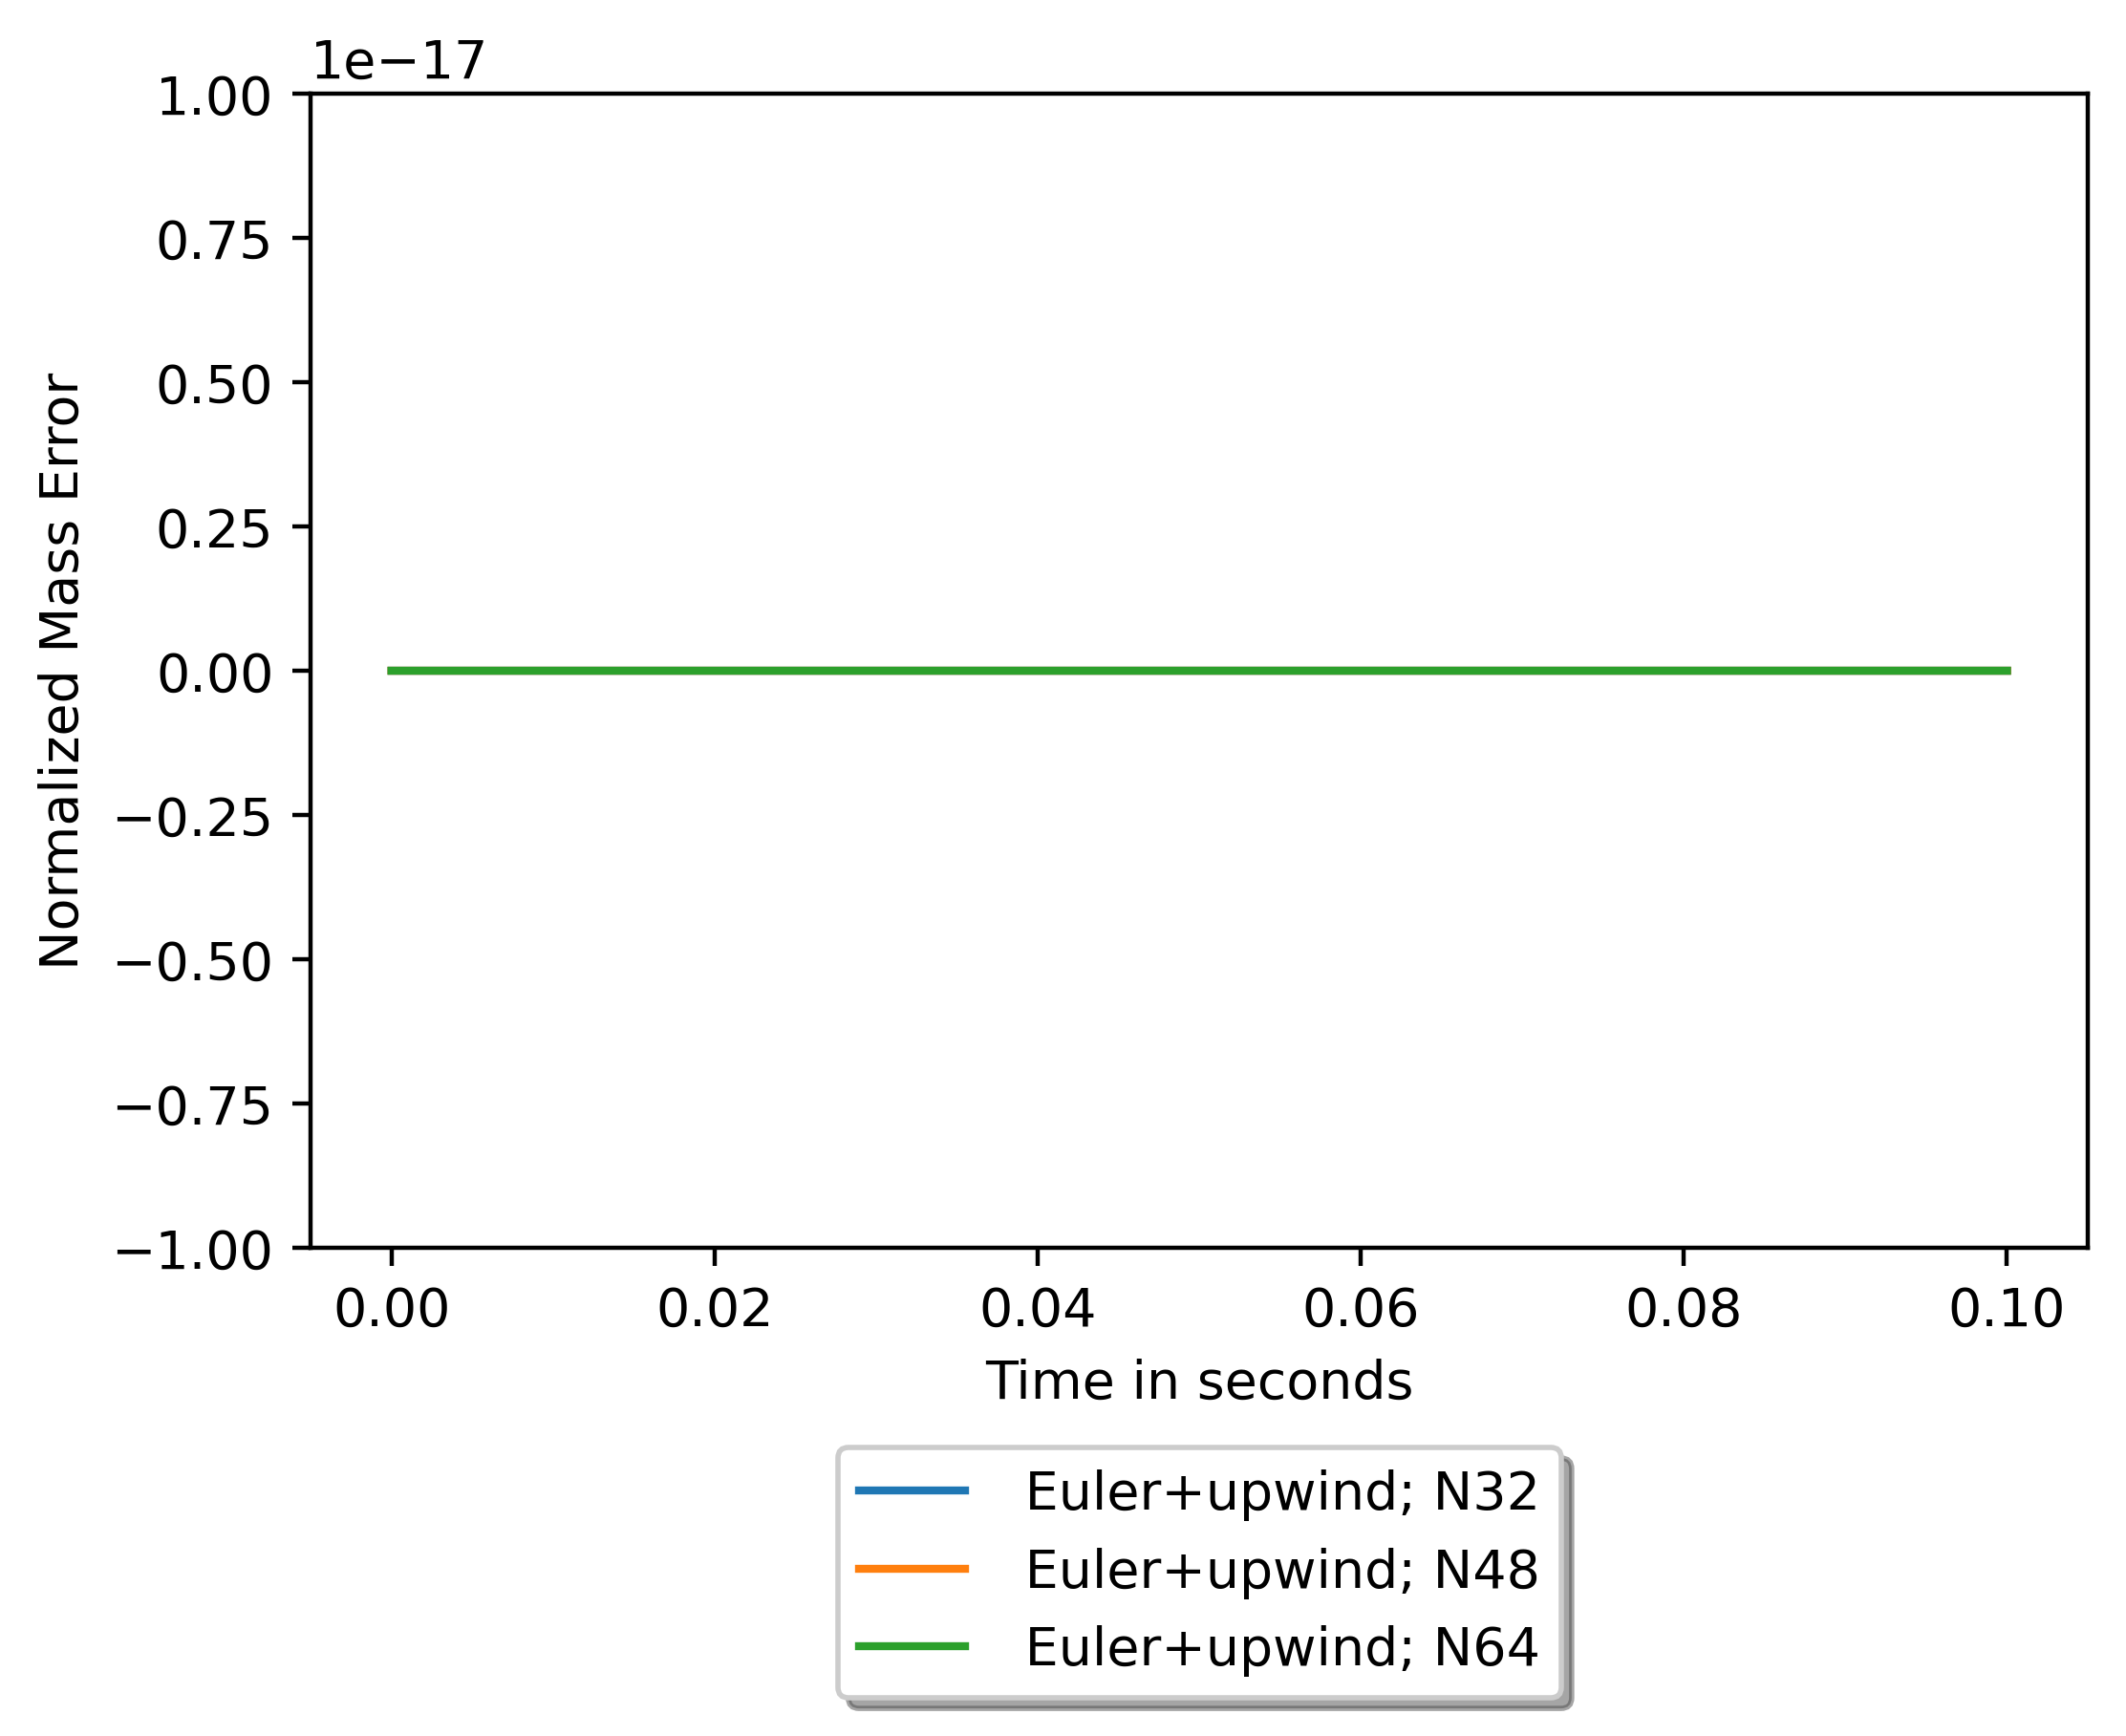

In [13]:
dframe_isoAdv_mass_EulerUpwind=dframe_isoAdv_bubblepproc.loc[(dframe_isoAdv_bubblepproc.index.get_level_values('timeSchemes') == 'Euler') & (dframe_isoAdv_bubblepproc.index.get_level_values('fluxSchemes') == 'upwind')]
plot_conservation_Euler_upwind(dframe_isoAdv_mass_EulerUpwind,"bubbleVolume","Normalized Mass Error")

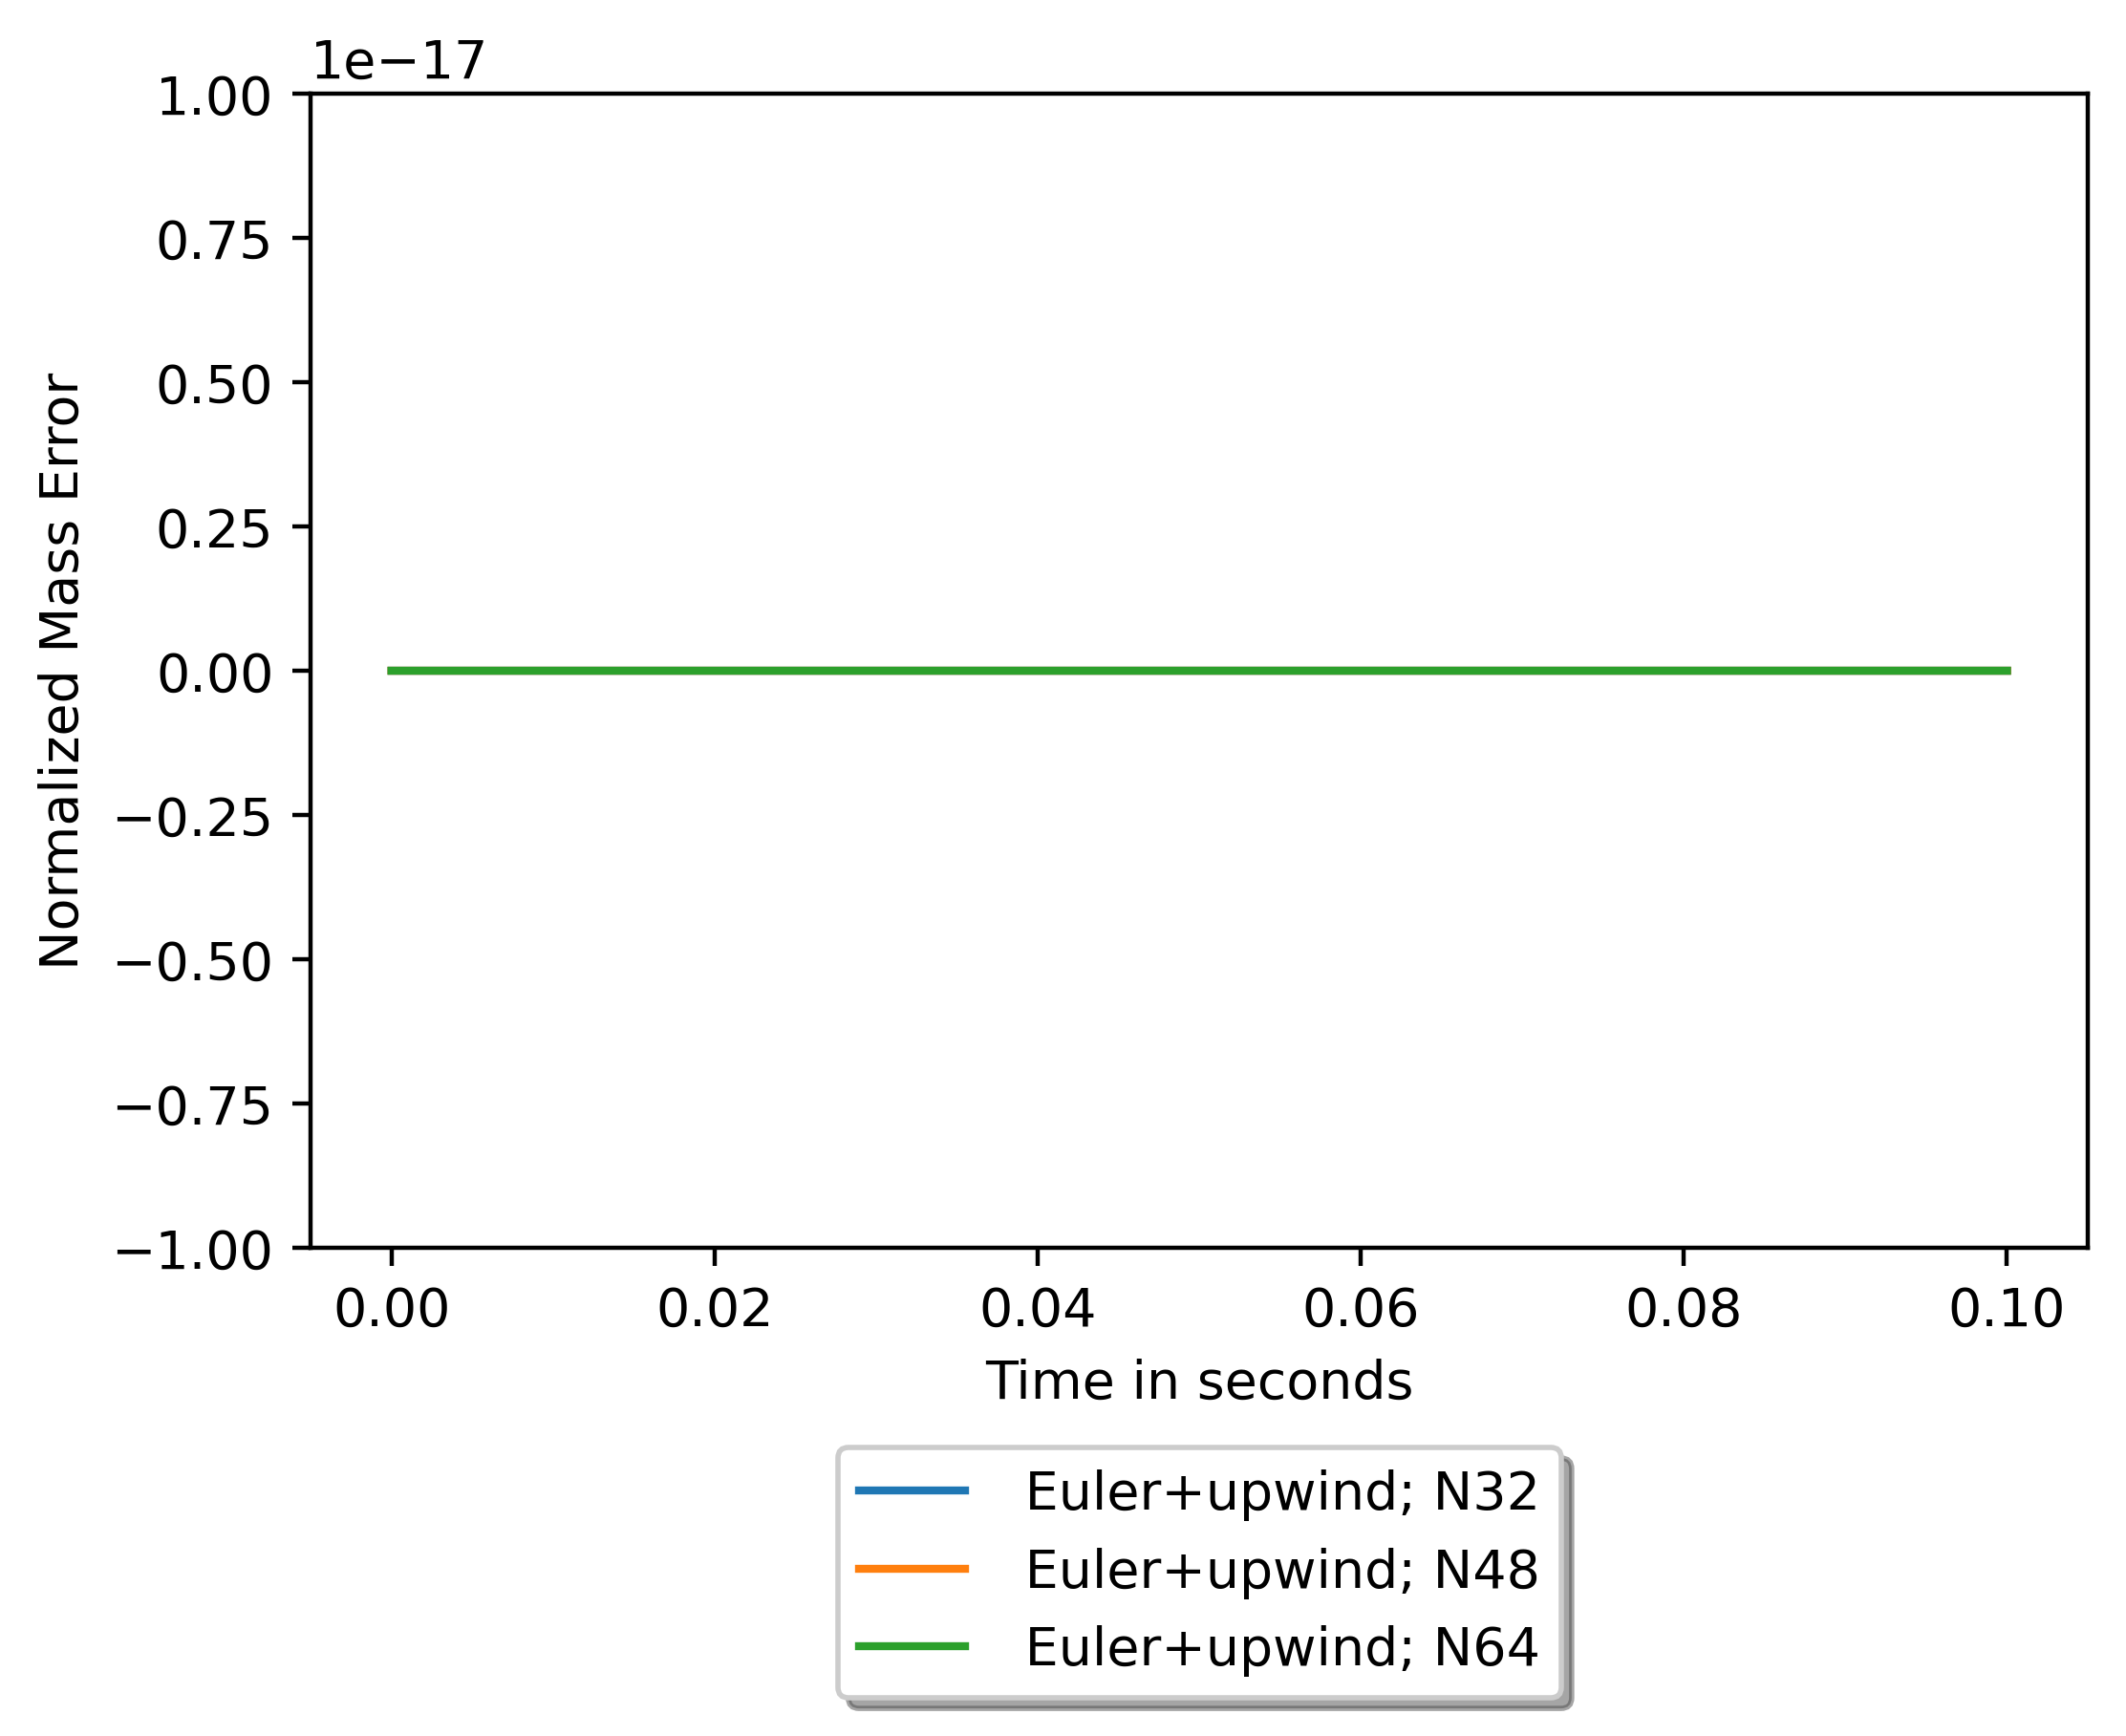

In [16]:
dframe_isoRho_mass_EulerUpwind=dframe_isoRho_bubblepproc.loc[(dframe_isoRho_bubblepproc.index.get_level_values('timeSchemes') == 'Euler') & (dframe_isoRho_bubblepproc.index.get_level_values('fluxSchemes') == 'upwind')]
plot_conservation_Euler_upwind(dframe_isoRho_mass_EulerUpwind,"bubbleVolume","Normalized Mass Error")

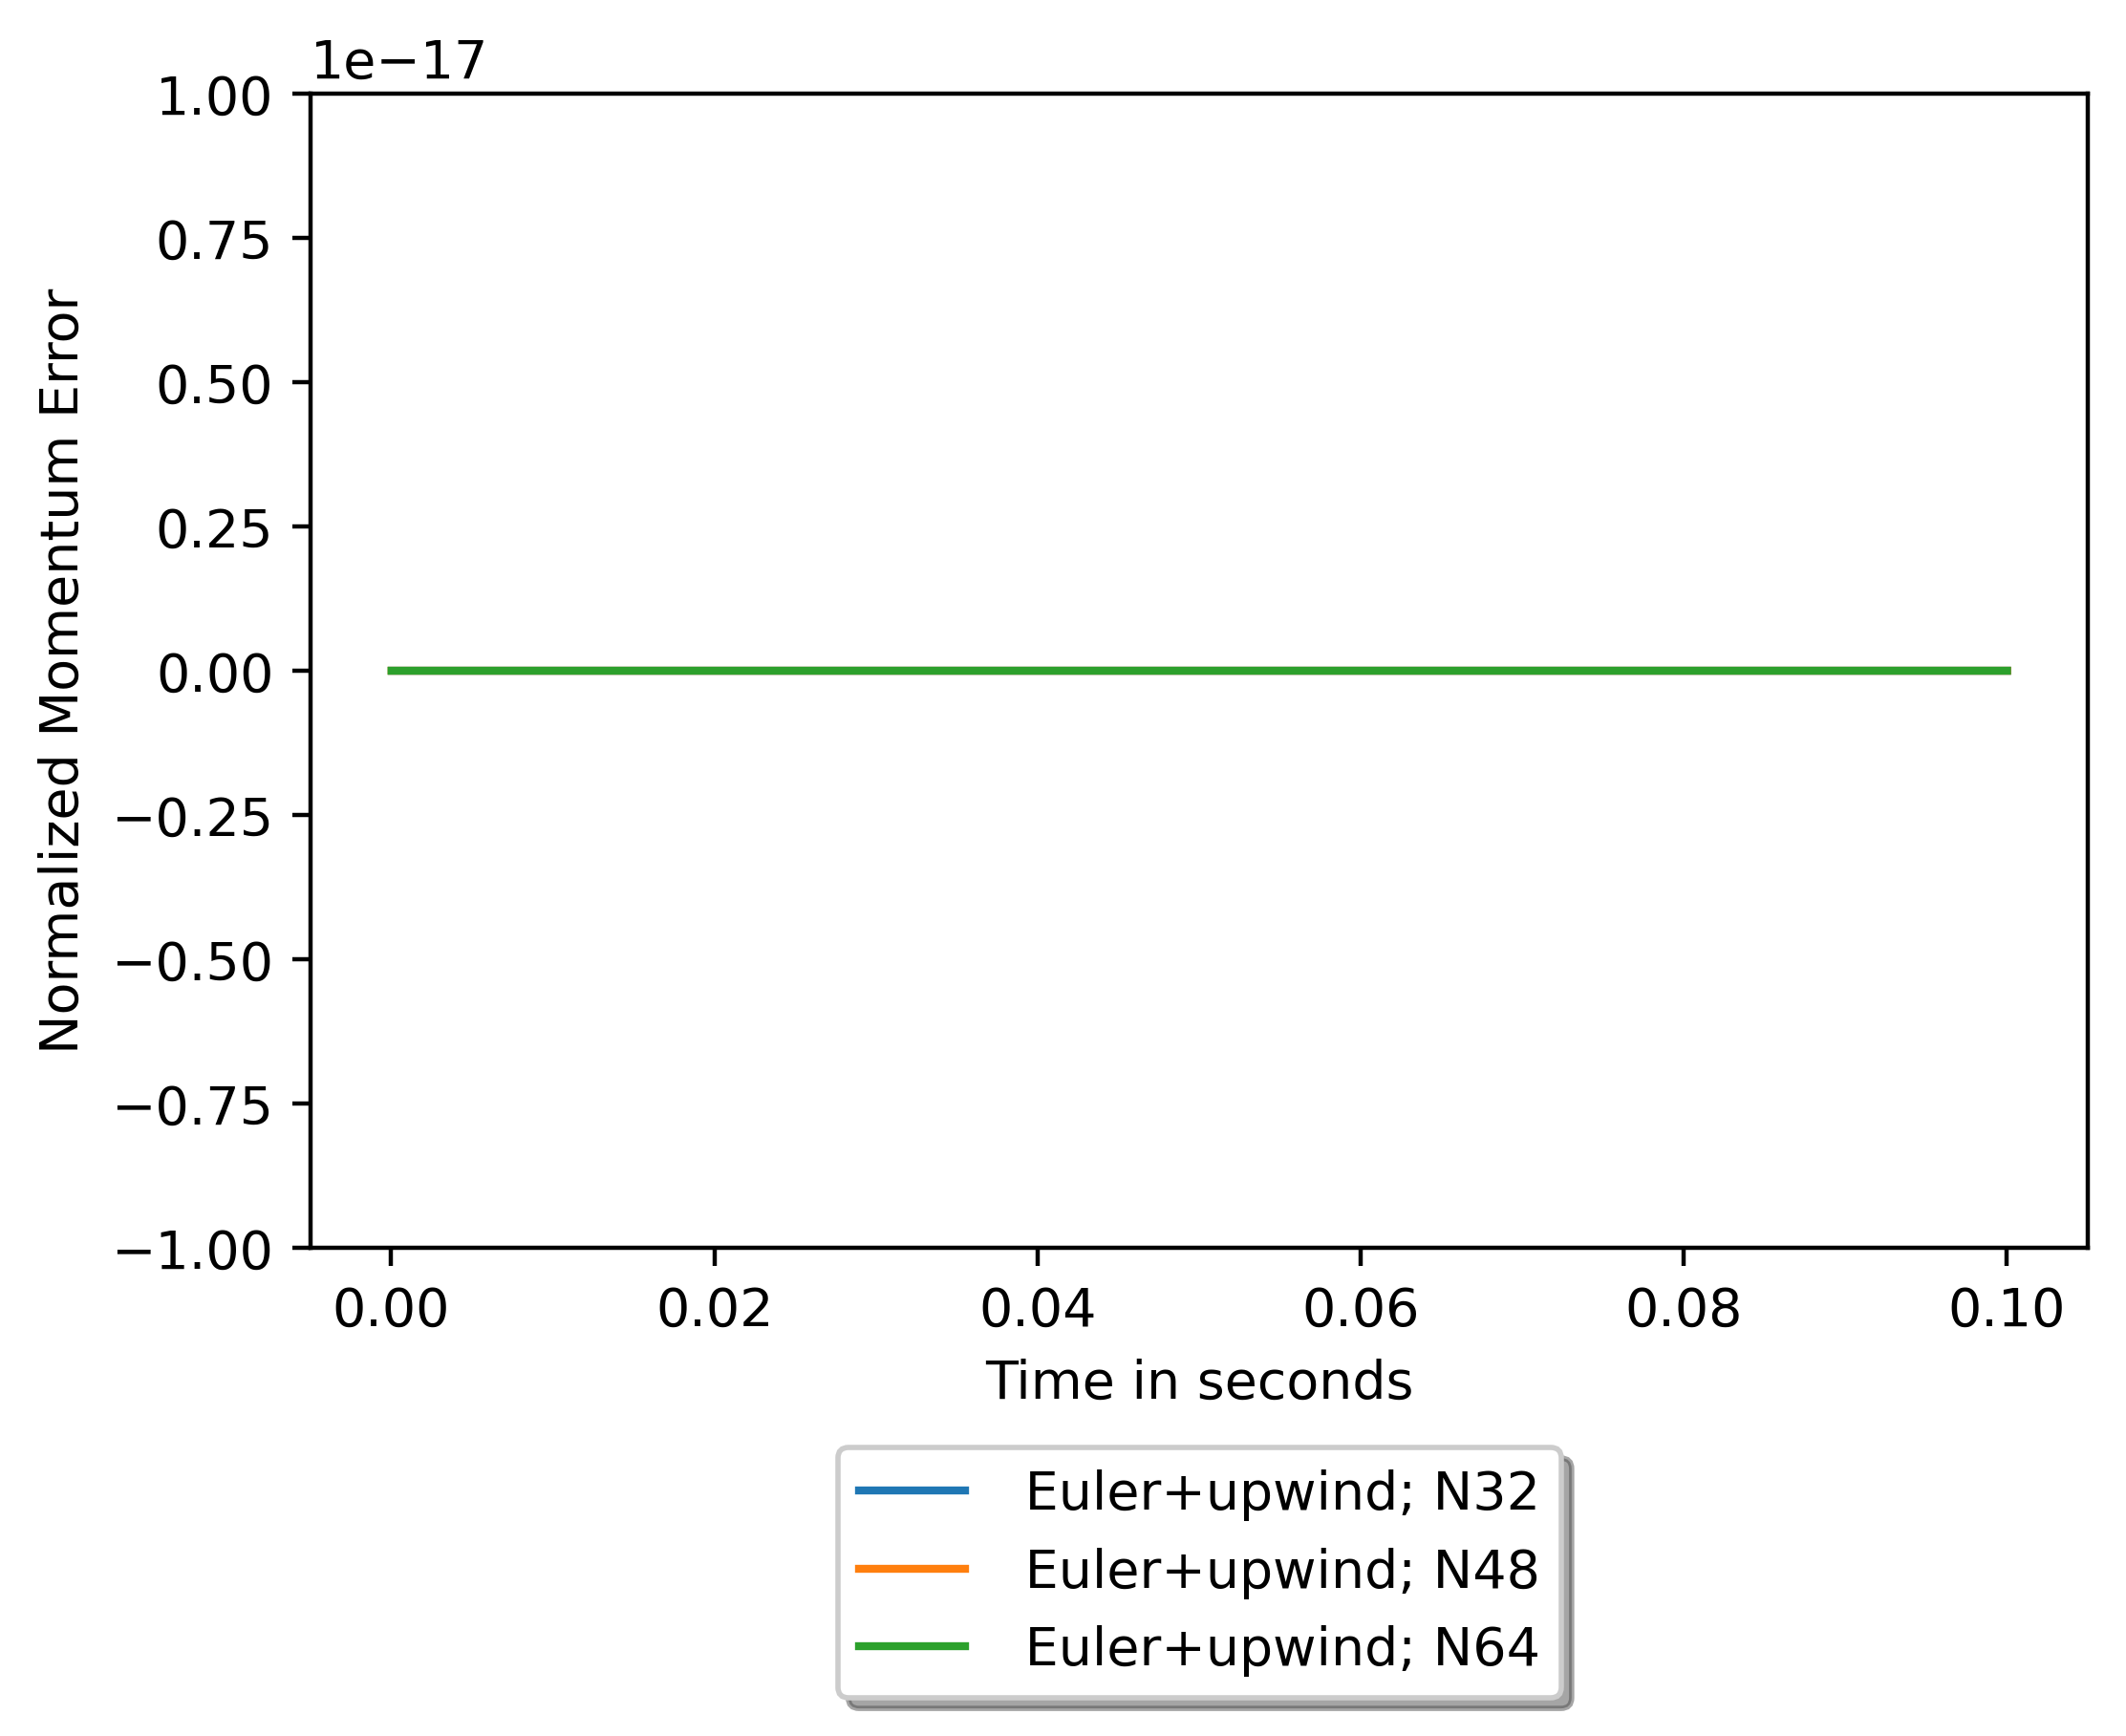

In [17]:
dframe_isoAdv_MOM_EulerUpwind=dframe_isoAdv_SumMOM.loc[(dframe_isoAdv_SumMOM.index.get_level_values('timeSchemes') == 'Euler') & (dframe_isoAdv_SumMOM.index.get_level_values('fluxSchemes') == 'upwind')]
plot_conservation_Euler_upwind(dframe_isoAdv_MOM_EulerUpwind,"SumKinE3","Normalized Momentum Error")

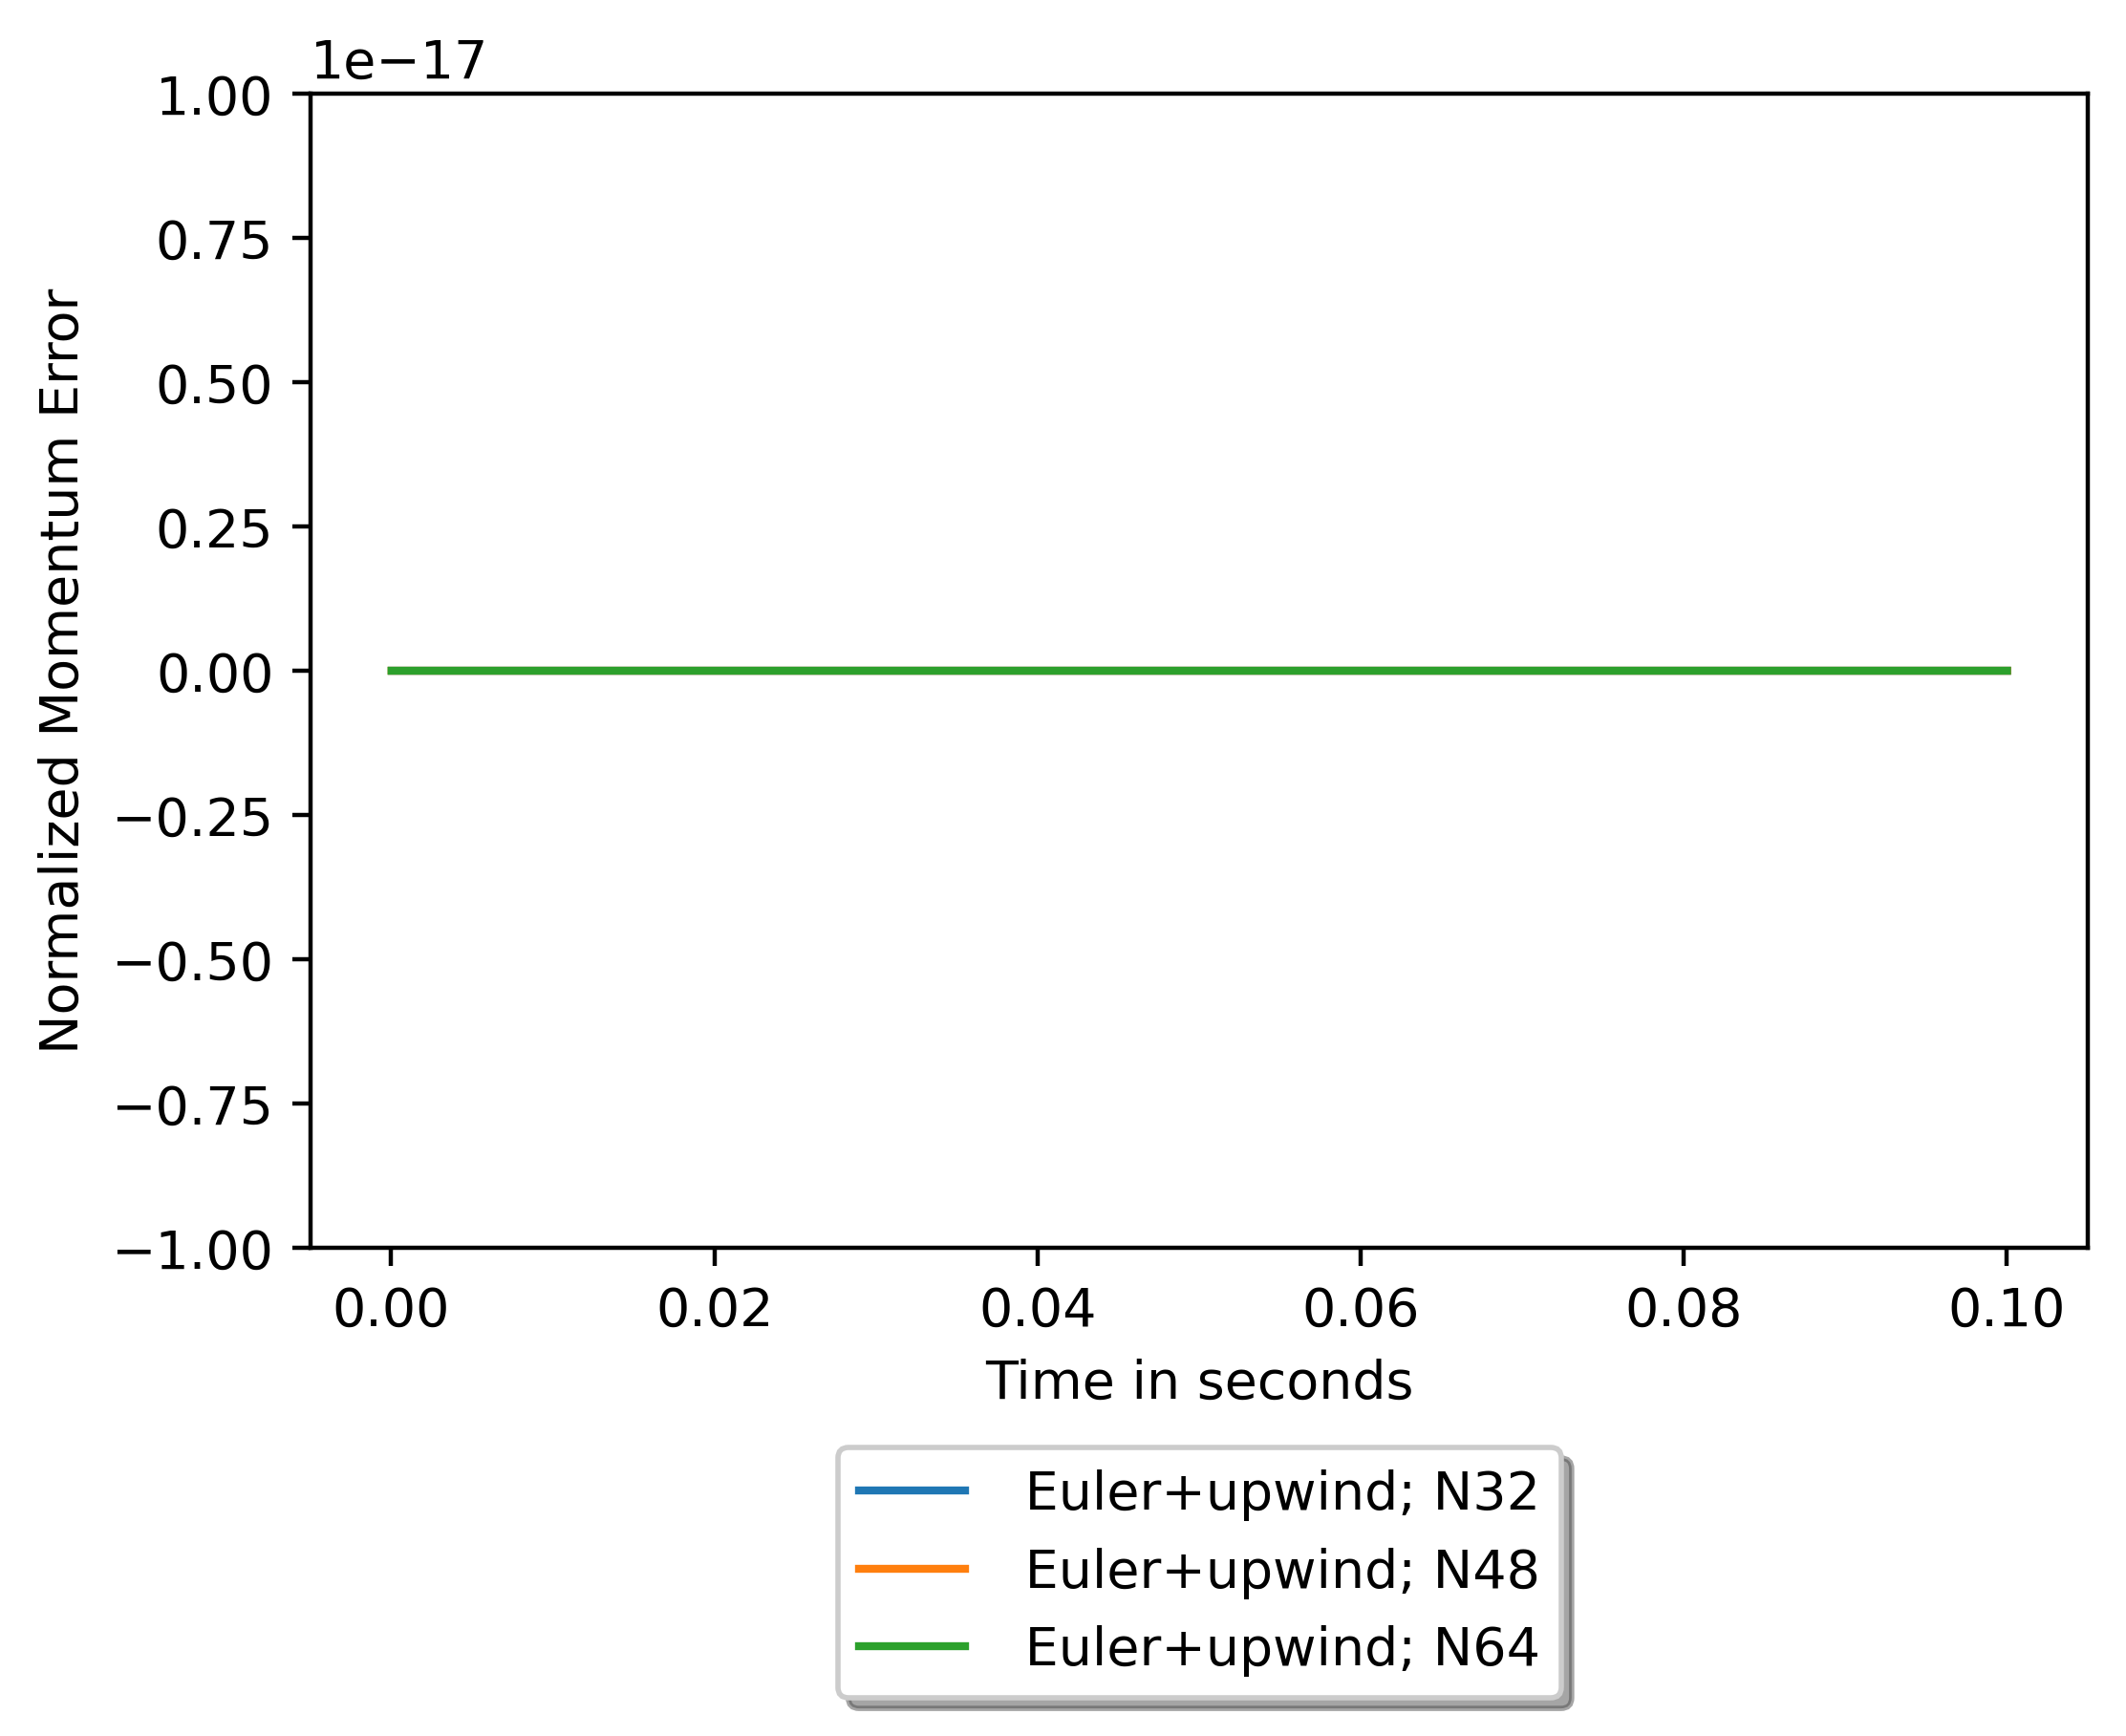

In [18]:
dframe_isoRho_MOM_EulerUpwind=dframe_isoRho_SumMOM.loc[(dframe_isoRho_SumMOM.index.get_level_values('timeSchemes') == 'Euler') & (dframe_isoRho_SumMOM.index.get_level_values('fluxSchemes') == 'upwind')]
plot_conservation_Euler_upwind(dframe_isoAdv_MOM_EulerUpwind,"SumKinE3","Normalized Momentum Error")

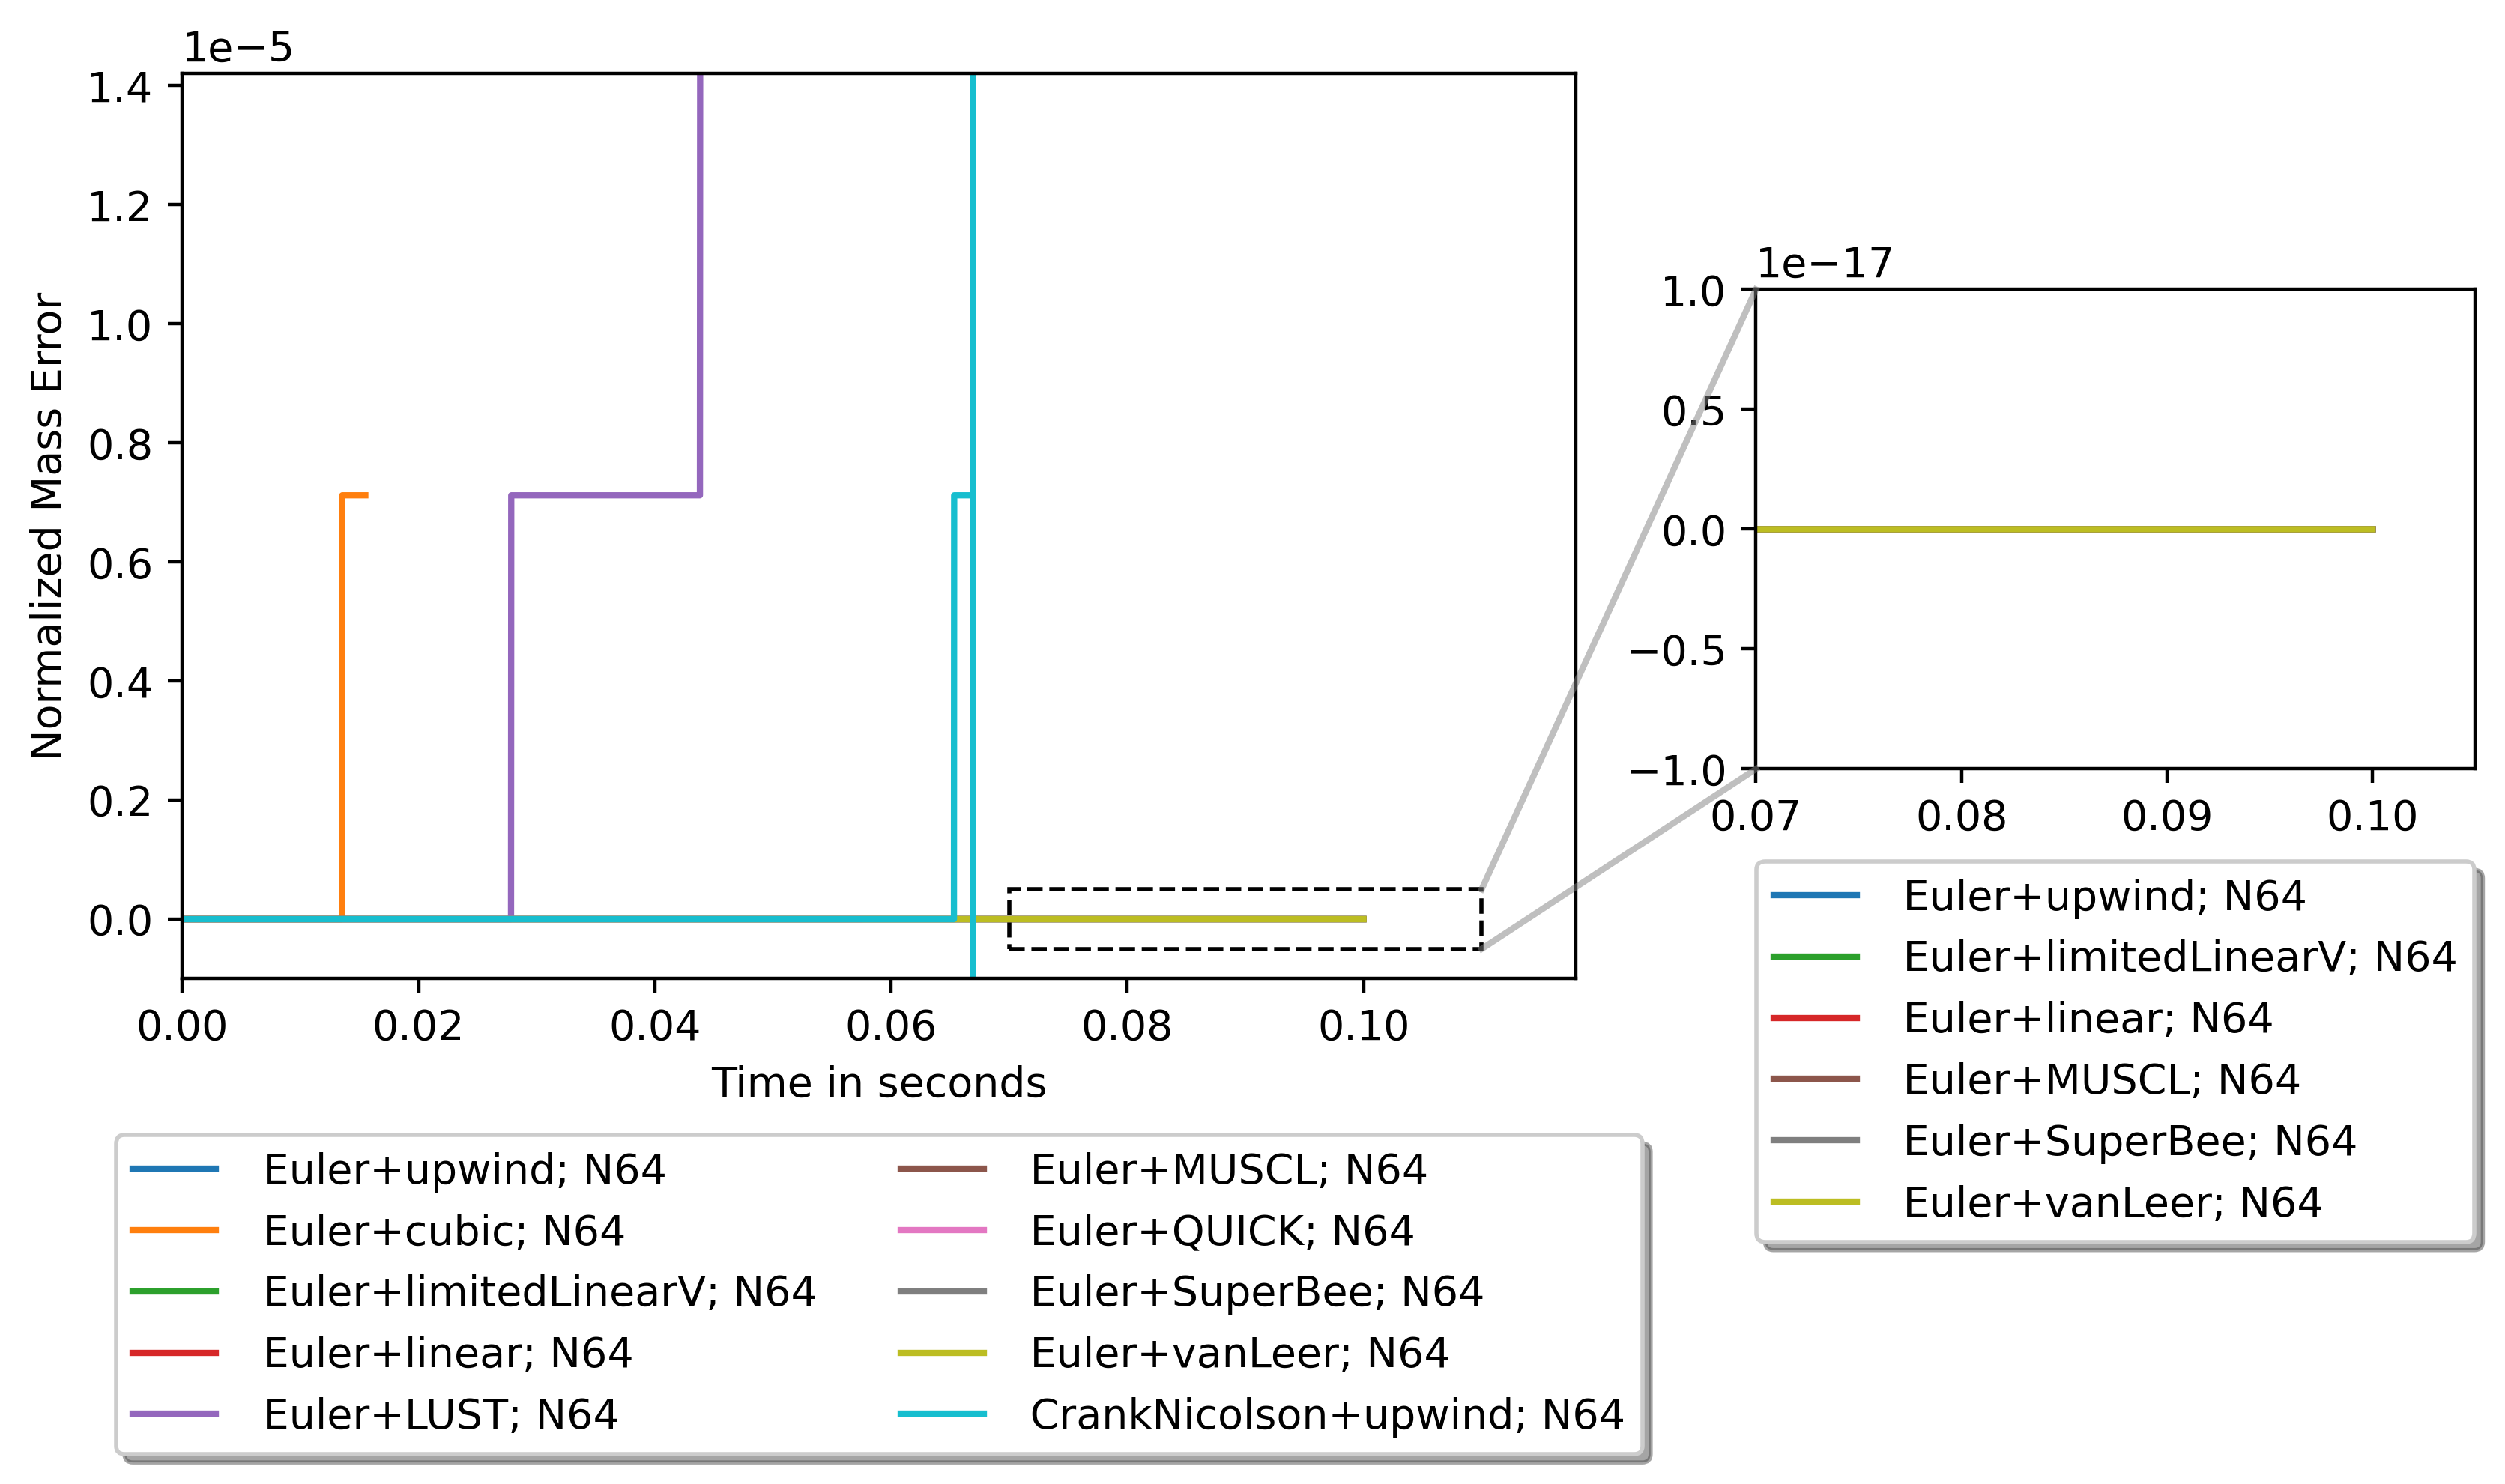

In [22]:
dframe_isoAdv_Euler_N64_CN = dframe_isoAdv_bubblepproc.loc[((dframe_isoAdv_bubblepproc.index.get_level_values('timeSchemes') == 'Euler') & (dframe_isoAdv_bubblepproc.index.get_level_values('resolution') == 64)) 
                                            | ((dframe_isoAdv_bubblepproc.index.get_level_values('timeSchemes') == 'CrankNicolson') & (dframe_isoAdv_bubblepproc.index.get_level_values('fluxSchemes') == 'upwind')& (dframe_isoAdv_bubblepproc.index.get_level_values('resolution') == 64))]                                          

plot_schemes_dframe(dframe_isoAdv_Euler_N64_CN, "bubbleVolume", "Normalized Mass Error",1e-17,5e-7,-1e-6, 1.42e-5)

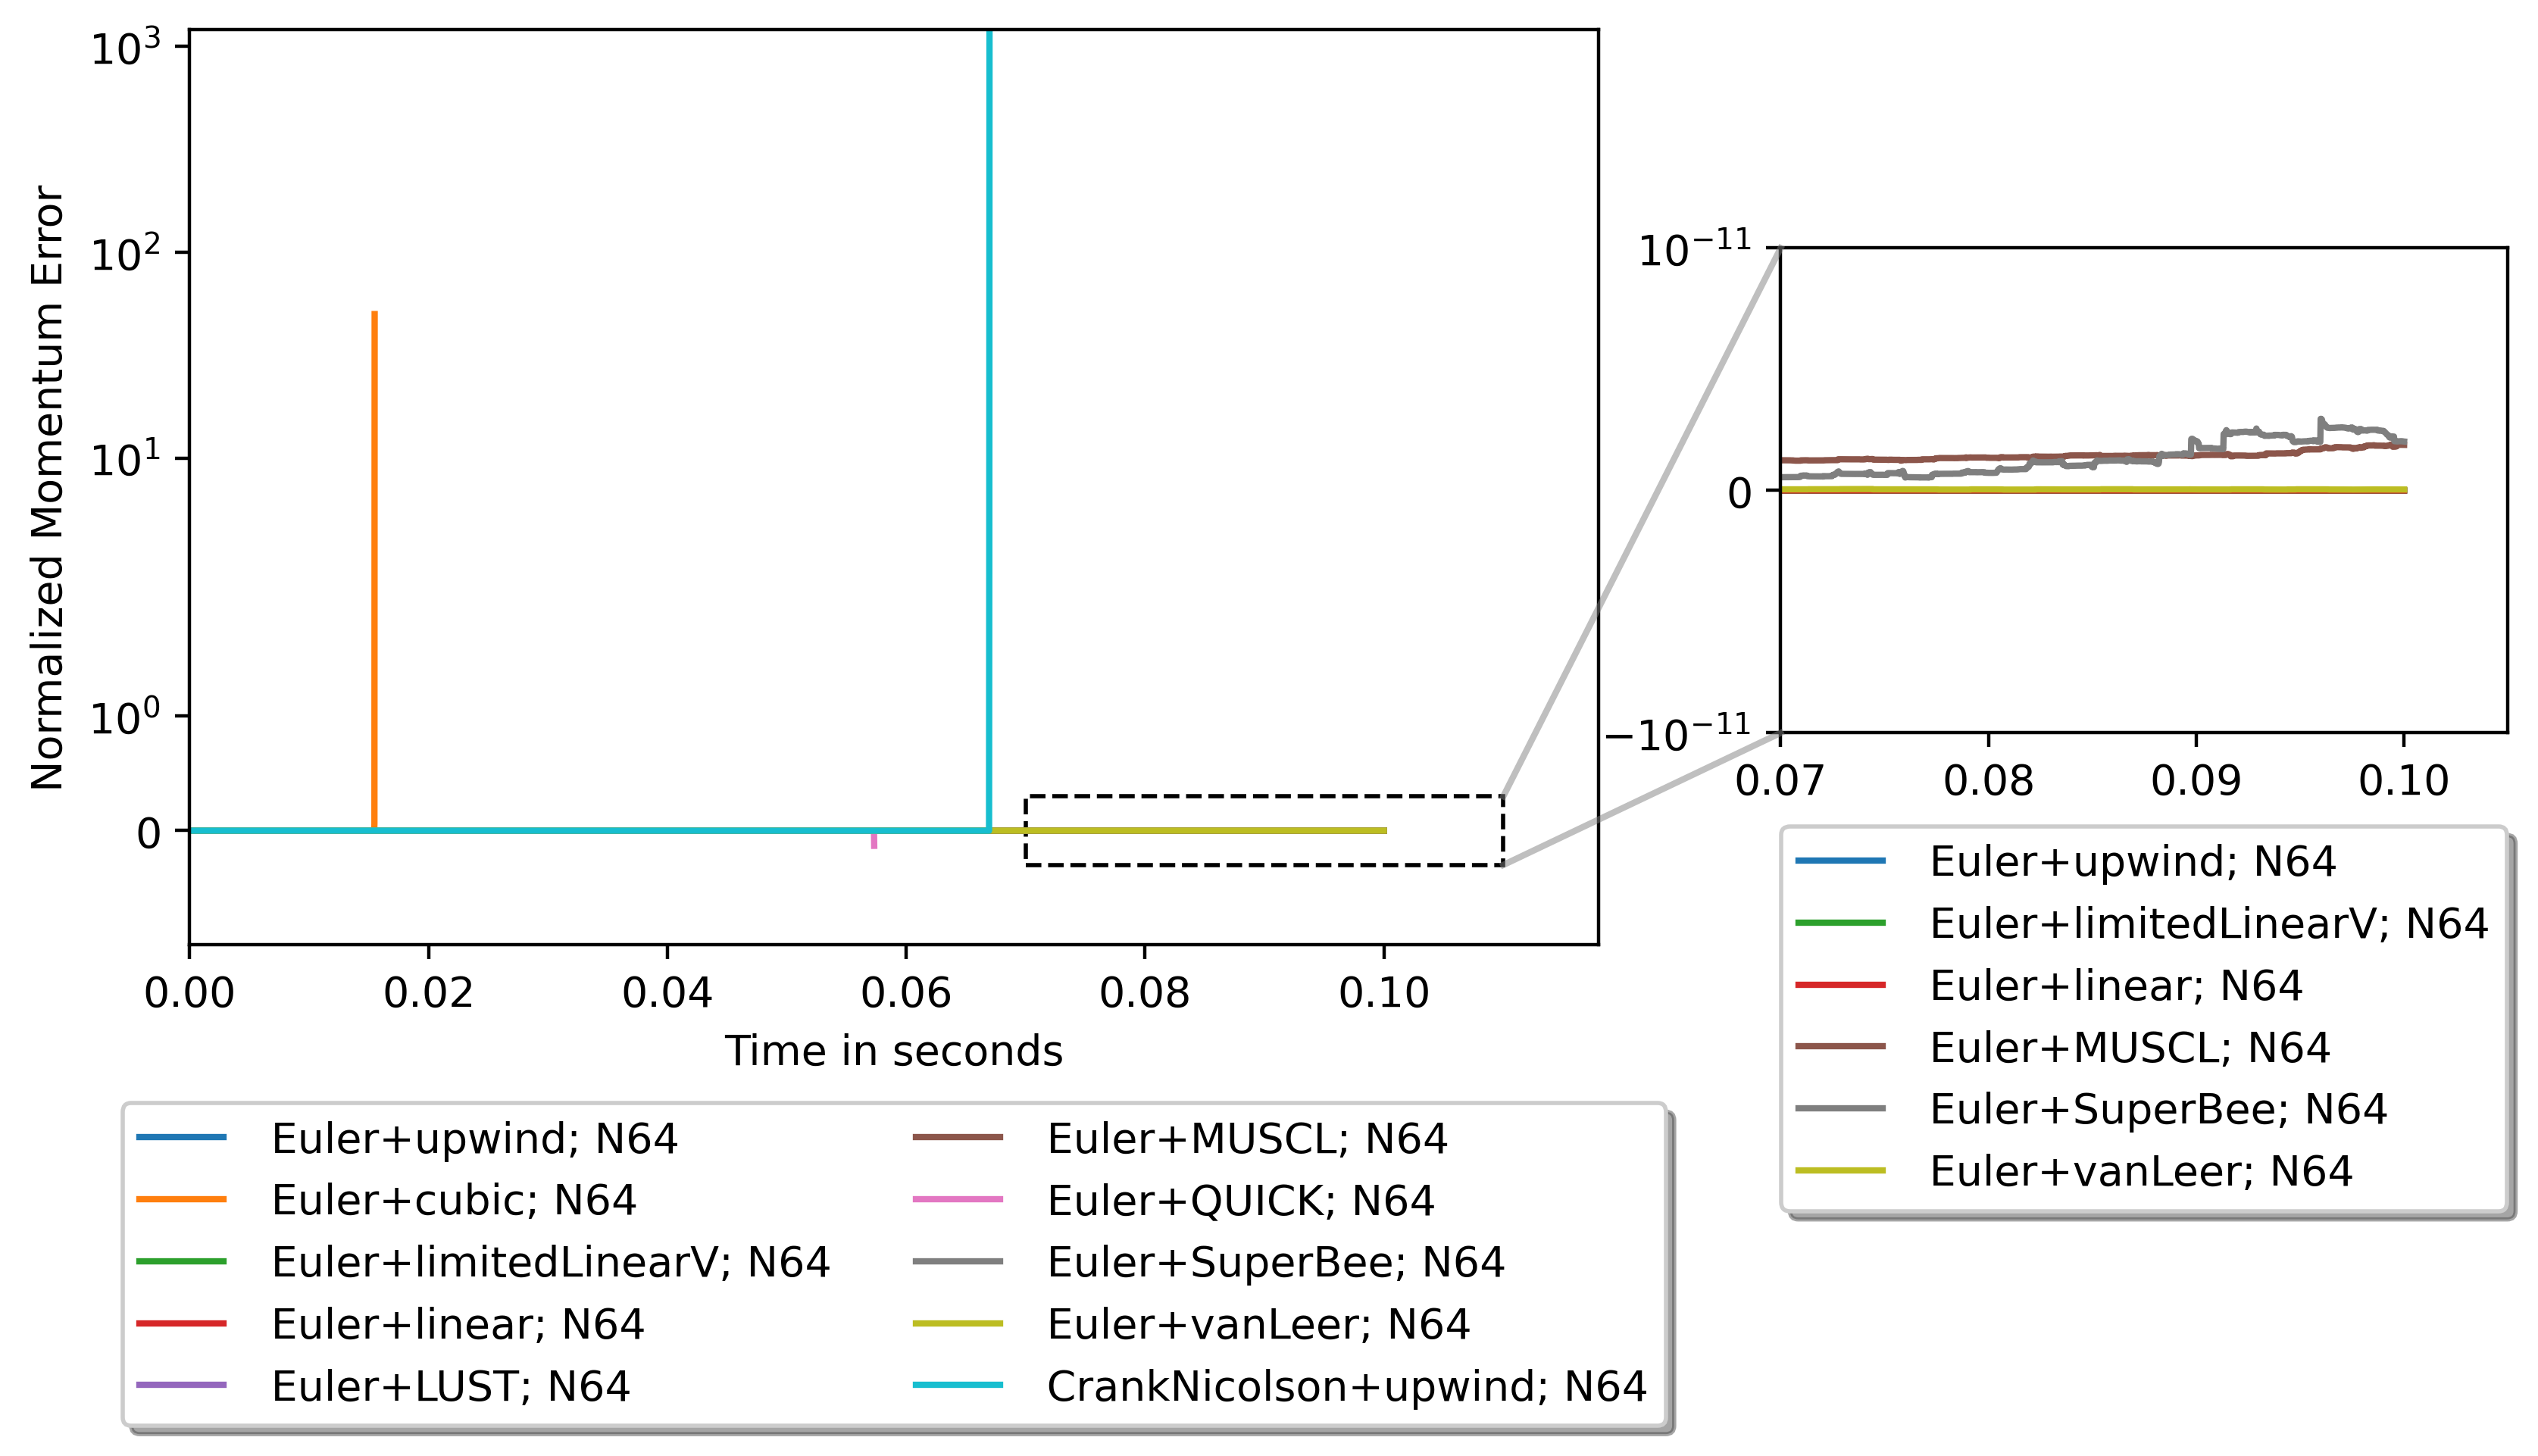

In [23]:
dframe_isoAdv_Euler_N64_CN = dframe_isoAdv_SumMOM.loc[((dframe_isoAdv_SumMOM.index.get_level_values('timeSchemes') == 'Euler') & (dframe_isoAdv_SumMOM.index.get_level_values('resolution') == 64)) 
                                            | ((dframe_isoAdv_SumMOM.index.get_level_values('timeSchemes') == 'CrankNicolson') & (dframe_isoAdv_SumMOM.index.get_level_values('fluxSchemes') == 'upwind')& (dframe_isoAdv_SumMOM.index.get_level_values('resolution') == 64))]                                          

plot_schemes_dframe(dframe_isoAdv_Euler_N64_CN, "SumKinE3", "Normalized Momentum Error",1e-11,0.3,-1,1.2e3,"symlog",extraticks=[0])

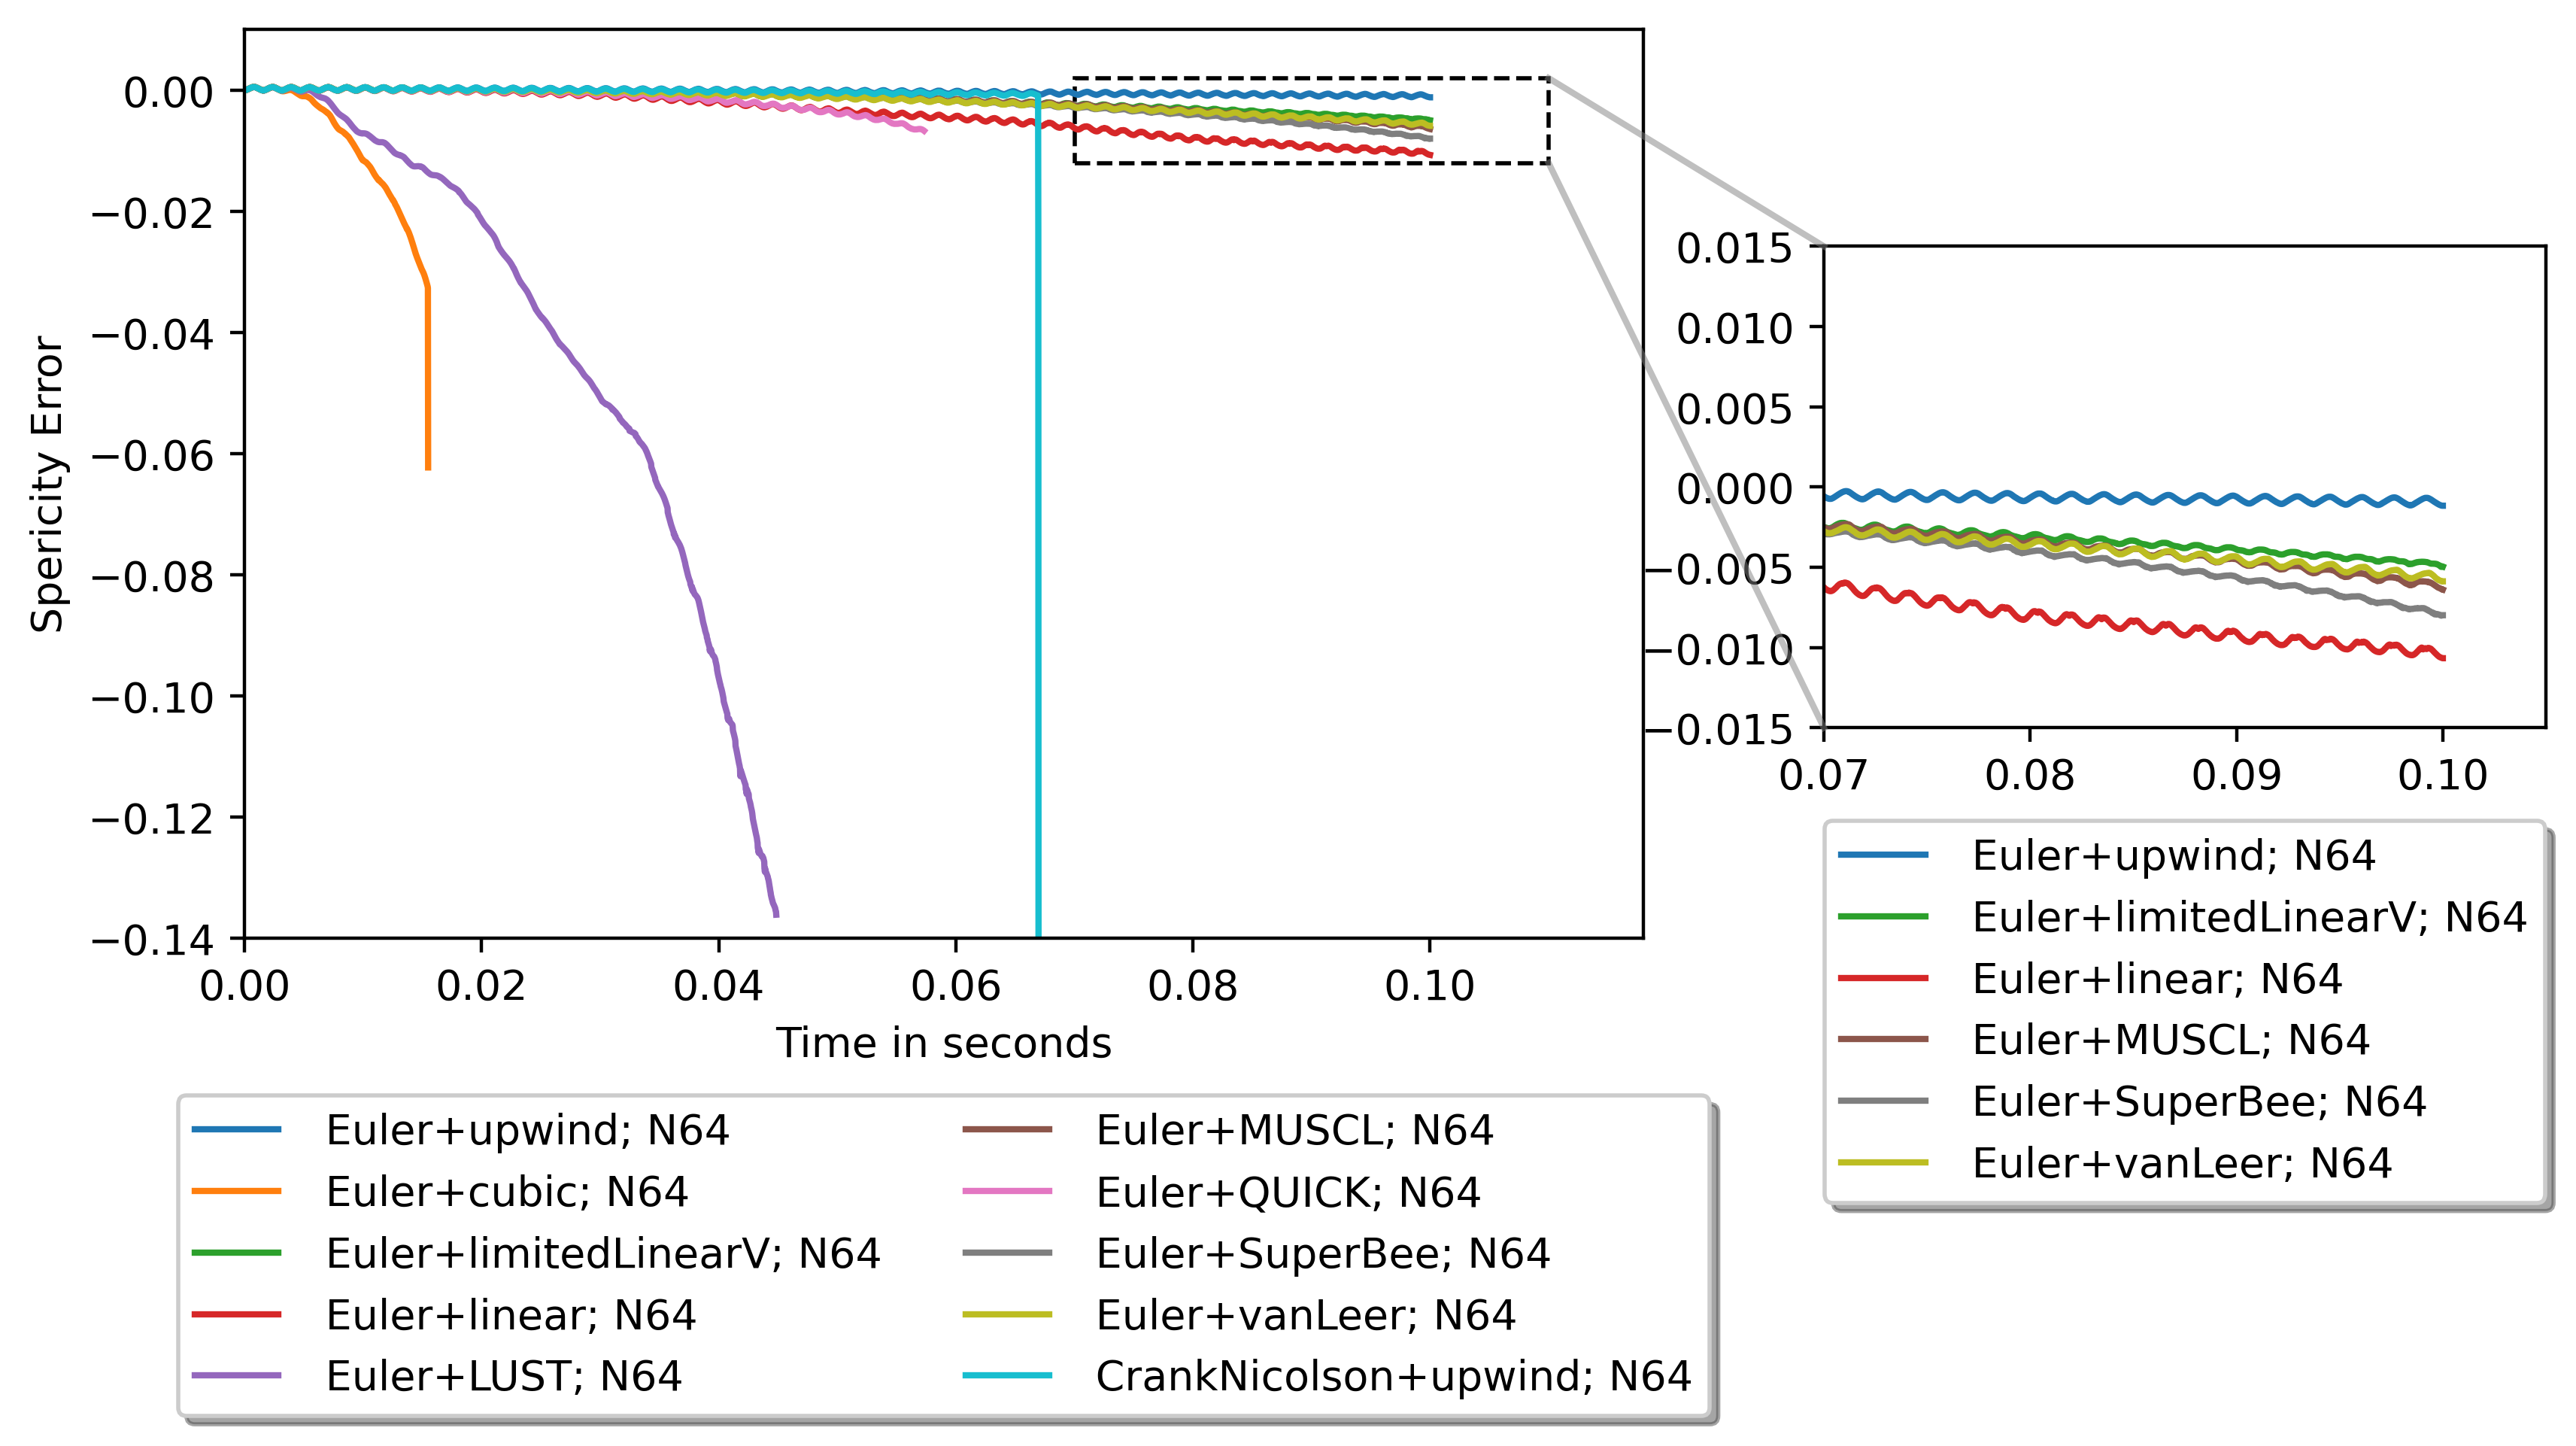

In [24]:
dframe_isoAdv_Euler_N64_CN = dframe_isoAdv_bubblepproc.loc[((dframe_isoAdv_bubblepproc.index.get_level_values('timeSchemes') == 'Euler') & (dframe_isoAdv_bubblepproc.index.get_level_values('resolution') == 64)) 
                                            | ((dframe_isoAdv_bubblepproc.index.get_level_values('timeSchemes') == 'CrankNicolson') & (dframe_isoAdv_bubblepproc.index.get_level_values('fluxSchemes') == 'upwind')& (dframe_isoAdv_bubblepproc.index.get_level_values('resolution') == 64))]                                          

plot_schemes_dframe(dframe_isoAdv_Euler_N64_CN,"sphericity", "Sphericity Error",0.012,0.012,-0.14,0.01,recWidth=0.014)

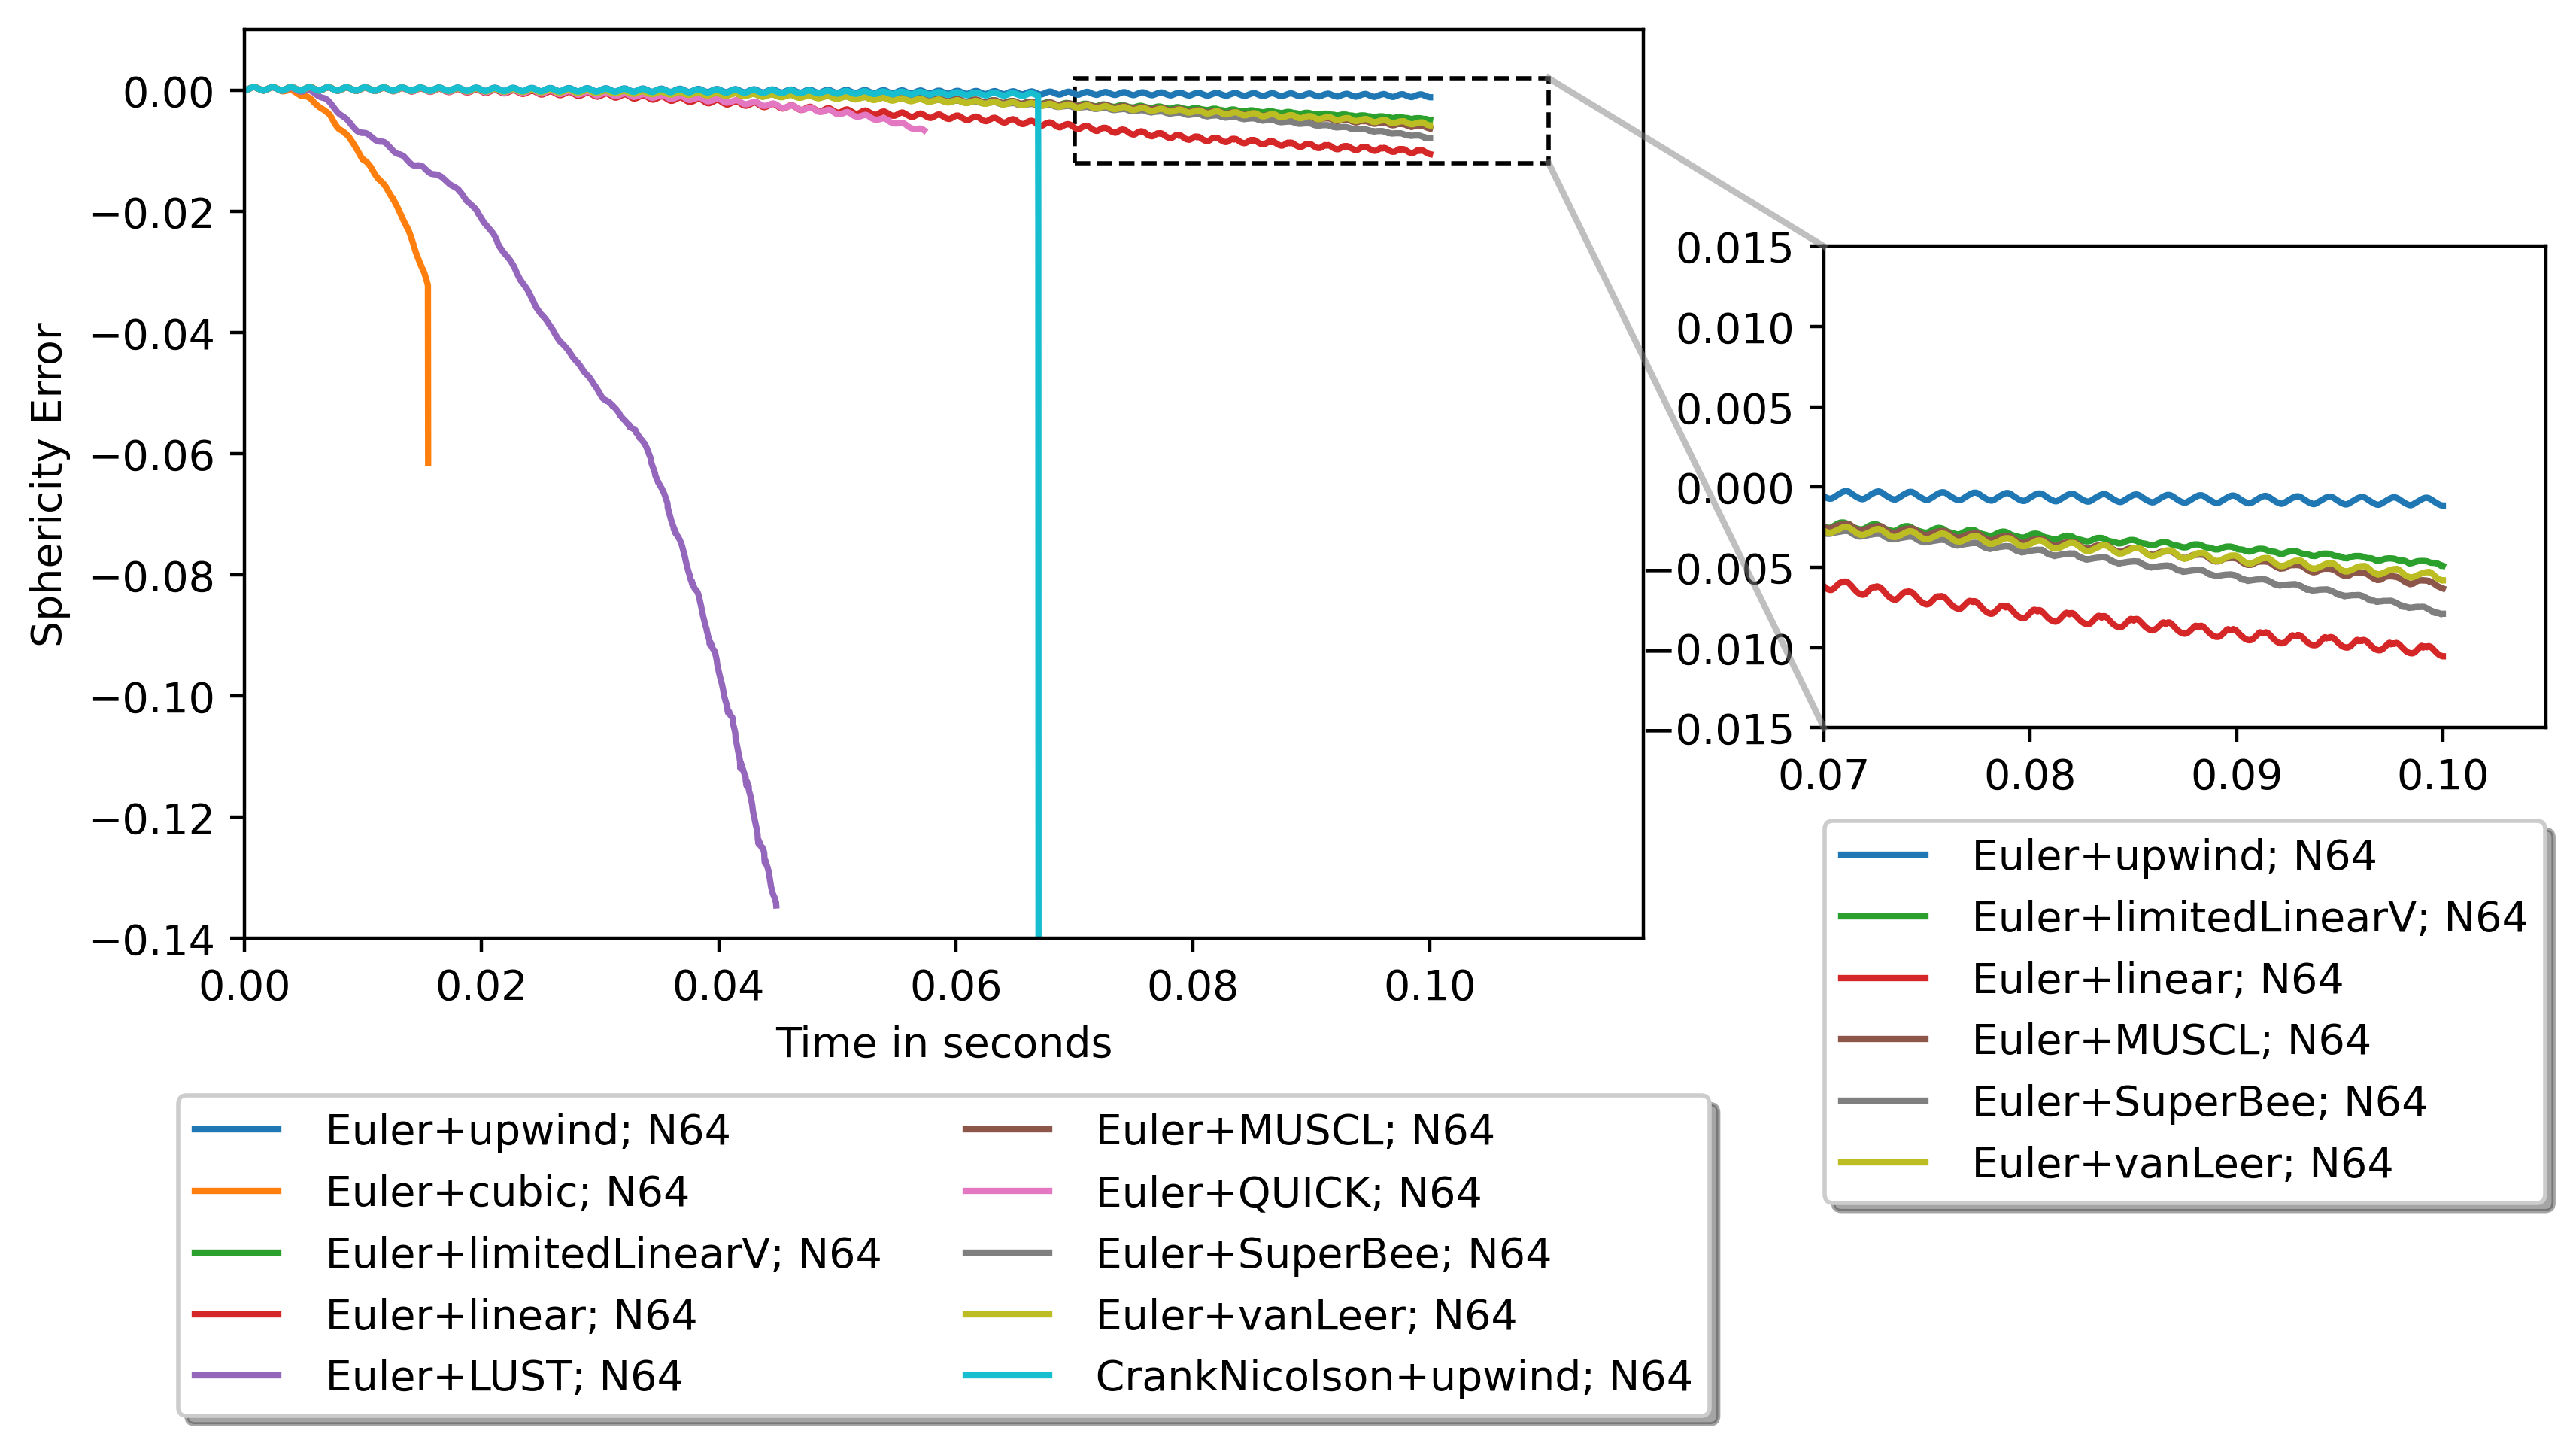

In [24]:
dframe_isoAdv_Euler_N64_CN = dframe_isoAdv_bubblepproc.loc[((dframe_isoAdv_bubblepproc.index.get_level_values('timeSchemes') == 'Euler') & (dframe_isoAdv_bubblepproc.index.get_level_values('resolution') == 64)) 
                                            | ((dframe_isoAdv_bubblepproc.index.get_level_values('timeSchemes') == 'CrankNicolson') & (dframe_isoAdv_bubblepproc.index.get_level_values('fluxSchemes') == 'upwind')& (dframe_isoAdv_bubblepproc.index.get_level_values('resolution') == 64))]                                          

plot_schemes_dframe(dframe_isoAdv_Euler_N64_CN,"sphericity", "Sphericity Error",0.012,0.012,-0.14,0.01,recWidth=0.014)